In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import pandas as pd

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FM = drop_unnamed_columns(FM)
MM = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Change the 'age' variable data type from float to integer
FS['age'] = FS['age'].astype(int)
FM['age'] = FM['age'].astype(int)
MM['age'] = MM['age'].astype(int)
MS['age'] = MS['age'].astype(int)

# Display the data types to confirm the change
print(FS.dtypes)
print(FM.dtypes)
print(MM.dtypes)
print(MS.dtypes)


age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object
age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object
age                           int64


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataframes
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# List of binary variables to test
binary_variables = ['smoking', 'high_blood_pressure', 'anaemia', 'diabetes']

# Function to perform Chi-Square test between each pair of binary variables
def chi_square_test(data, var1, var2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return chi2, p

# Dictionary to store the results for each demographic group
chi_square_results = {}

# List of dataframes and corresponding demographic group names
demographics = {
    'Female Survivors': FS,
    'Female Deaths': FM,
    'Male Deaths': MM,
    'Male Survivors': MS
}

# Run Chi-Square tests separately for each demographic group
for group_name, df in demographics.items():
    print(f"Results for {group_name}:\n")
    chi_square_results[group_name] = {}

    for i in range(len(binary_variables)):
        for j in range(i + 1, len(binary_variables)):
            var1 = binary_variables[i]
            var2 = binary_variables[j]
            chi2, p_value = chi_square_test(df, var1, var2)
            chi_square_results[group_name][f'{var1} vs {var2}'] = {'Chi-Square': chi2, 'P-Value': p_value}

            print(f"{var1} vs {var2}:")
            print(f"Chi-Square Statistic: {chi2}")
            print(f"P-Value: {p_value}\n")

    print("="*50 + "\n")


Results for Female Survivors:

smoking vs high_blood_pressure:
Chi-Square Statistic: 6.554239579892209
P-Value: 0.010463454587684004

smoking vs anaemia:
Chi-Square Statistic: 7.027945446495149
P-Value: 0.008024736817655994

smoking vs diabetes:
Chi-Square Statistic: 8.200331935009824
P-Value: 0.004188272656481688

high_blood_pressure vs anaemia:
Chi-Square Statistic: 0.0073028666812953655
P-Value: 0.9318982290193494

high_blood_pressure vs diabetes:
Chi-Square Statistic: 19.669618770836635
P-Value: 9.20533175692625e-06

anaemia vs diabetes:
Chi-Square Statistic: 1.175282772825379
P-Value: 0.27831842574827775


Results for Female Deaths:

smoking vs high_blood_pressure:
Chi-Square Statistic: 3.3142782515732447
P-Value: 0.06868047256535413

smoking vs anaemia:
Chi-Square Statistic: 0.0016184359644515207
P-Value: 0.9679099282490886

smoking vs diabetes:
Chi-Square Statistic: 0.0
P-Value: 1.0

high_blood_pressure vs anaemia:
Chi-Square Statistic: 4.204149414168031
P-Value: 0.0403251931628

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataframes
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Combine the dataframes
df = pd.concat([FS, FM, MM, MS])

# List of binary variables to test against DEATH_EVENT
binary_variables = ['smoking', 'high_blood_pressure', 'anaemia', 'diabetes', 'sex']

# Dictionary to store the p-values
chi_square_results = {}

# Perform Chi-Square test for each binary variable against DEATH_EVENT
for var in binary_variables:
    contingency_table = pd.crosstab(df[var], df['DEATH_EVENT'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[var] = p

# Print the results
print("Chi-Square Test Results for Association with DEATH_EVENT:")
for var, p_value in chi_square_results.items():
    print(f"{var}: p-value = {p_value}")


Chi-Square Test Results for Association with DEATH_EVENT:
smoking: p-value = 0.5276830107676712
high_blood_pressure: p-value = 3.6715748221572216e-11
anaemia: p-value = 0.0001314084504967406
diabetes: p-value = 0.4434246767522827
sex: p-value = 9.622532489654621e-05


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, norm
import numpy as np

# Load the dataframes
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Combine the dataframes
df = pd.concat([FS, FM, MM, MS])

# List of binary variables to test against DEATH_EVENT
binary_variables = ['smoking', 'high_blood_pressure', 'anaemia', 'diabetes', 'sex']

# Dictionary to store the p-values, confidence intervals, and Cohen's d
chi_square_results = {}

# Function to calculate Cohen's d for binary outcomes
def cohens_d_binary(var, target):
    group1 = df[df[var] == 0][target]
    group2 = df[df[var] == 1][target]
    mean_diff = group2.mean() - group1.mean()
    pooled_var = (np.var(group1, ddof=1) + np.var(group2, ddof=1)) / 2
    d = mean_diff / np.sqrt(pooled_var)
    return d

# Function to calculate confidence intervals for proportions
def confidence_interval_binary(var, target, confidence=0.95):
    contingency_table = pd.crosstab(df[var], df[target])
    n1 = contingency_table.loc[0].sum()
    n2 = contingency_table.loc[1].sum()
    prop1 = contingency_table.loc[0, 1] / n1 if n1 != 0 else 0
    prop2 = contingency_table.loc[1, 1] / n2 if n2 != 0 else 0
    prop_diff = prop2 - prop1
    se = np.sqrt((prop1 * (1 - prop1) / n1) + (prop2 * (1 - prop2) / n2))
    z = norm.ppf((1 + confidence) / 2)
    ci_low = prop_diff - z * se
    ci_high = prop_diff + z * se
    return (ci_low, ci_high)

# Perform Chi-Square test, calculate CIs, and Cohen's d for each binary variable against DEATH_EVENT
for var in binary_variables:
    contingency_table = pd.crosstab(df[var], df['DEATH_EVENT'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    ci_low, ci_high = confidence_interval_binary(var, 'DEATH_EVENT')
    d = cohens_d_binary(var, 'DEATH_EVENT')

    chi_square_results[var] = {
        'p_value': p,
        '95% CI': (ci_low, ci_high),
        'cohens_d': d
    }

# Print the results
print("Chi-Square Test Results for Association with DEATH_EVENT, including Confidence Intervals and Cohen's d:")
for var, results in chi_square_results.items():
    print(f"{var}: p-value = {results['p_value']:.4f}, 95% CI = ({results['95% CI'][0]:.4f}, {results['95% CI'][1]:.4f}), Cohen's d = {results['cohens_d']:.4f}")


Chi-Square Test Results for Association with DEATH_EVENT, including Confidence Intervals and Cohen's d:
smoking: p-value = 0.5277, 95% CI = (-0.0184, 0.0373), Cohen's d = 0.0203
high_blood_pressure: p-value = 0.0000, 95% CI = (0.0635, 0.1177), Cohen's d = 0.1942
anaemia: p-value = 0.0001, 95% CI = (0.0249, 0.0764), Cohen's d = 0.1092
diabetes: p-value = 0.4434, 95% CI = (-0.0364, 0.0153), Cohen's d = -0.0227
sex: p-value = 0.0001, 95% CI = (0.0275, 0.0804), Cohen's d = 0.1172


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load the data
male = pd.read_csv("Male.csv")
female = pd.read_csv("Female.csv")

# Add a 'sex' column to each DataFrame to distinguish between male and female
male['sex'] = 1  # Assuming 1 represents males
female['sex'] = 0  # Assuming 0 represents females

# Combine the two DataFrames into one
df = pd.concat([male, female])

# Function to calculate confidence intervals for proportions
def confidence_interval_binary(var, target, confidence=0.95):
    contingency_table = pd.crosstab(df[var], df[target])
    n1 = contingency_table.loc[0].sum()
    n2 = contingency_table.loc[1].sum()
    prop1 = contingency_table.loc[0, 1] / n1 if n1 != 0 else 0
    prop2 = contingency_table.loc[1, 1] / n2 if n2 != 0 else 0
    prop_diff = prop2 - prop1
    se = np.sqrt((prop1 * (1 - prop1) / n1) + (prop2 * (1 - prop2) / n2))
    z = norm.ppf((1 + confidence) / 2)
    ci_low = prop_diff - z * se
    ci_high = prop_diff + z * se
    return contingency_table, (ci_low, ci_high)

# Calculate the confidence interval for the difference in proportions for sex and DEATH_EVENT
contingency_table, ci = confidence_interval_binary('sex', 'DEATH_EVENT')

# Display the contingency table and the confidence interval
print("Contingency Table:")
print(contingency_table)
print(f"95% Confidence Interval for the difference in proportions: {ci}")


Contingency Table:
DEATH_EVENT     0     1
sex                    
0            1278   494
1            2154  1074
95% Confidence Interval for the difference in proportions: (0.027473622482900983, 0.08039181006134365)


In [ ]:
import statsmodels.api as sm
# Load the dataframes
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Combine the dataframes
df = pd.concat([FS, FM, MM, MS])
# Assume df is your dataframe with predictors and 'DEATH_EVENT' as the binary outcome variable.
# Add a constant term for the intercept
df['intercept'] = 1.0

# Define the independent variables (binary predictors)
X = df[['smoking', 'high_blood_pressure', 'anaemia', 'diabetes', 'sex', 'intercept']]
y = df['DEATH_EVENT']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())
# None of the predictors (smoking, high blood pressure, anaemia,diabetes, or sex) are statistically significant in this model.
#This means that based on this logistic regression analysis, these variables do not
# have a statistically significant effect on the likelihood of death (DEATH_EVENT)

Optimization terminated successfully.
         Current function value: 0.613843
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4994
Method:                           MLE   Df Model:                            5
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                 0.01304
Time:                        01:28:53   Log-Likelihood:                -3069.2
converged:                       True   LL-Null:                       -3109.8
Covariance Type:            nonrobust   LLR p-value:                 4.989e-16
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoking                -0.0676      0.073     -0.921      0.357      -0.212       0.076
hi

In [ ]:
import pandas as pd

# Load the dataframes
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FM = drop_unnamed_columns(FM)
MM = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Function to calculate statistics
def calculate_statistics(df):
    mode_df = df.mode().transpose()
    mode_df.columns = [f'Mode {i+1}' for i in range(len(mode_df.columns))]

    stats = pd.DataFrame({
        'Mean': df.mean(),
        'Median': df.median(),
        'Variance': df.var(),
        'Standard Deviation': df.std(),
        'Min': df.min(),
        'Max': df.max(),
        '25th Percentile': df.quantile(0.25),
        '50th Percentile': df.quantile(0.50),  # This is equivalent to the median
        '75th Percentile': df.quantile(0.75),
    }).transpose()
    # # Combine the stats with the mode(s)
    # =stats = pd.concat([stats, mode_df], axis=1)

    stats = stats.join(mode_df)

    return stats

# Calculate statistics for each dataframe
FS_stats = calculate_statistics(FS)
FM_stats = calculate_statistics(FM)
MM_stats = calculate_statistics(MM)
MS_stats = calculate_statistics(MS)

# Display the results
print("Statistics for Female Survivors (FS):")
print(FS_stats)
print("\nStatistics for Female Deaths (FM):")
print(FM_stats)
print("\nStatistics for Male Deaths (MM):")
print(MM_stats)
print("\nStatistics for Male Survivors (MS):")
print(MS_stats)


Statistics for Female Survivors (FS):
                           age   anaemia  creatinine_phosphokinase  diabetes  \
Mean                 57.795261  0.485915                474.107981  0.510172   
Median               58.000000  0.000000                217.000000  1.000000   
Variance            108.890918  0.249997             359807.795692  0.250092   
Standard Deviation   10.435081  0.499997                599.839808  0.500092   
Min                  40.000000  0.000000                 25.000000  0.000000   
Max                  90.000000  1.000000               7702.000000  1.000000   
25th Percentile      50.000000  0.000000                101.000000  0.000000   
50th Percentile      58.000000  0.000000                217.000000  1.000000   
75th Percentile      65.000000  1.000000                582.000000  1.000000   

                    ejection_fraction  high_blood_pressure     platelets  \
Mean                        40.462441             0.375587  2.810296e+05   
Median   

In [ ]:
import pandas as pd

# Load the dataframes
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FM = drop_unnamed_columns(FM)
MM = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Function to calculate statistics
def calculate_statistics(df):
    # Calculate the modes and handle cases where there might be multiple modes
    mode_df = df.mode().transpose()
    mode_df.columns = [f'Mode {i+1}' for i in range(len(mode_df.columns))]

    # If there are fewer modes than the expected (e.g., only one mode), add NaN for missing modes
    if mode_df.shape[1] < 2:
        for i in range(2 - mode_df.shape[1]):
            mode_df[f'Mode {mode_df.shape[1] + 1}'] = pd.NA

    stats = pd.DataFrame({
        'Mean': df.mean(),
        'Median': df.median(),
        'Variance': df.var(),
        'Standard Deviation': df.std(),
        'Min': df.min(),
        'Max': df.max(),
        '25th Percentile': df.quantile(0.25),
        '50th Percentile': df.quantile(0.50),  # This is equivalent to the median
        '75th Percentile': df.quantile(0.75),
    }).transpose()

    # Combine the stats with the mode(s)
    stats = stats.join(mode_df)

    return stats

# Calculate statistics for each dataframe
FS_stats = calculate_statistics(FS)
FM_stats = calculate_statistics(FM)
MM_stats = calculate_statistics(MM)
MS_stats = calculate_statistics(MS)

# Display the results
print("Statistics for Female Survivors (FS):")
print(FS_stats)
print("\nStatistics for Female Deaths (FM):")
print(FM_stats)
print("\nStatistics for Male Deaths (MM):")
print(MM_stats)
print("\nStatistics for Male Survivors (MS):")
print(MS_stats)


Statistics for Female Survivors (FS):
                           age   anaemia  creatinine_phosphokinase  diabetes  \
Mean                 57.795261  0.485915                474.107981  0.510172   
Median               58.000000  0.000000                217.000000  1.000000   
Variance            108.890918  0.249997             359807.795692  0.250092   
Standard Deviation   10.435081  0.499997                599.839808  0.500092   
Min                  40.000000  0.000000                 25.000000  0.000000   
Max                  90.000000  1.000000               7702.000000  1.000000   
25th Percentile      50.000000  0.000000                101.000000  0.000000   
50th Percentile      58.000000  0.000000                217.000000  1.000000   
75th Percentile      65.000000  1.000000                582.000000  1.000000   

                    ejection_fraction  high_blood_pressure     platelets  \
Mean                        40.462441             0.375587  2.810296e+05   
Median   

In [ ]:
import pandas as pd

# Load the dataframes
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FM = drop_unnamed_columns(FM)
MM = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Function to calculate statistics including mode with mean and median
def calculate_statistics(df):
    # Calculate the modes
    modes = df.mode().iloc[0]  # Get the first mode for each column
    second_modes = df.mode().iloc[1] if df.mode().shape[0] > 1 else pd.Series([pd.NA] * len(df.columns), index=df.columns)

    # Calculate other statistics
    stats = pd.DataFrame({
        'Mean': df.mean(),
        'Median': df.median(),
        'Mode 1': modes,
        'Mode 2': second_modes,
        'Variance': df.var(),
        'Standard Deviation': df.std(),
        'Min': df.min(),
        'Max': df.max(),
        '25th Percentile': df.quantile(0.25),
        '50th Percentile': df.quantile(0.50),  # This is equivalent to the median
        '75th Percentile': df.quantile(0.75),
    })

    return stats

# Calculate statistics for each dataframe
FS_stats = calculate_statistics(FS)
FM_stats = calculate_statistics(FM)
MM_stats = calculate_statistics(MM)
MS_stats = calculate_statistics(MS)

# Display the results
print("Statistics for Female Survivors (FS):")
print(FS_stats)
print("\nStatistics for Female Deaths (FM):")
print(FM_stats)
print("\nStatistics for Male Deaths (MM):")
print(MM_stats)
print("\nStatistics for Male Survivors (MS):")
print(MS_stats)


Statistics for Female Survivors (FS):
                                   Mean    Median     Mode 1 Mode 2  \
age                           57.795261      58.0      70.00   <NA>   
anaemia                        0.485915       0.0       0.00   <NA>   
creatinine_phosphokinase     474.107981     217.0     582.00   <NA>   
diabetes                       0.510172       1.0       1.00   <NA>   
ejection_fraction             40.462441      40.0      40.00   <NA>   
high_blood_pressure            0.375587       0.0       0.00   <NA>   
platelets                 281029.557527  270000.0  263358.03   <NA>   
serum_creatinine               1.086455       1.0       0.90   <NA>   
serum_sodium                 137.857590     138.0     136.00   <NA>   
sex                            0.000000       0.0       0.00   <NA>   
smoking                        0.014867       0.0       0.00   <NA>   
time                         156.450704     172.0     187.00   <NA>   
DEATH_EVENT                    0.000000

In [ ]:
import pandas as pd

# Load the dataframes
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FM = drop_unnamed_columns(FM)
MM = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Function to calculate statistics for the 'age' variable
def calculate_age_statistics(df):
    age_column = df['age']

    # Calculate the modes
    modes = age_column.mode().iloc[0]  # Get the first mode for the age column
    second_modes = age_column.mode().iloc[1] if age_column.mode().shape[0] > 1 else pd.NA

    # Calculate other statistics
    stats = pd.DataFrame({
        'Mean': age_column.mean(),
        'Median': age_column.median(),
        'Mode 1': modes,
        'Mode 2': second_modes,
        'Variance': age_column.var(),
        'Standard Deviation': age_column.std(),
        'Min': age_column.min(),
        'Max': age_column.max(),
        '25th Percentile': age_column.quantile(0.25),
        '50th Percentile': age_column.quantile(0.50),  # This is equivalent to the median
        '75th Percentile': age_column.quantile(0.75),
    }, index=['age'])

    return stats

# Calculate statistics for the 'age' variable in each dataframe
FS_age_stats = calculate_age_statistics(FS)
FM_age_stats = calculate_age_statistics(FM)
MM_age_stats = calculate_age_statistics(MM)
MS_age_stats = calculate_age_statistics(MS)

# Display the results
print("Age Statistics for Female Survivors (FS):")
print(FS_age_stats)
print("\nAge Statistics for Female Deaths (FM):")
print(FM_age_stats)
print("\nAge Statistics for Male Deaths (MM):")
print(MM_age_stats)
print("\nAge Statistics for Male Survivors (MS):")
print(MS_age_stats)


Age Statistics for Female Survivors (FS):
          Mean  Median  Mode 1 Mode 2    Variance  Standard Deviation   Min  \
age  57.795261    58.0    70.0   <NA>  108.890918           10.435081  40.0   

      Max  25th Percentile  50th Percentile  75th Percentile  
age  90.0             50.0             58.0             65.0  

Age Statistics for Female Deaths (FM):
          Mean  Median  Mode 1 Mode 2    Variance  Standard Deviation   Min  \
age  62.629555    60.0    60.0   <NA>  161.345251           12.702175  40.0   

      Max  25th Percentile  50th Percentile  75th Percentile  
age  95.0             50.0             60.0             72.0  

Age Statistics for Male Deaths (MM):
          Mean  Median  Mode 1 Mode 2    Variance  Standard Deviation   Min  \
age  65.513661    65.0    60.0   <NA>  174.587163           13.213144  42.0   

      Max  25th Percentile  50th Percentile  75th Percentile  
age  95.0            55.75             65.0             75.0  

Age Statistics for Male 

In [ ]:
import pandas as pd
from scipy import stats

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Extract the ejection_fraction columns
FS_ef = FS['ejection_fraction']
FM_ef = FM['ejection_fraction']
MM_ef = MM['ejection_fraction']
MS_ef = MS['ejection_fraction']

# Perform independent t-tests
# FS vs FM
t_stat_FS_FM, p_value_FS_FM = stats.ttest_ind(FS_ef, FM_ef, equal_var=False)
# MS vs MM
t_stat_MS_MM, p_value_MS_MM = stats.ttest_ind(MS_ef, MM_ef, equal_var=False)
# FS vs MS
t_stat_FS_MS, p_value_FS_MS = stats.ttest_ind(FS_ef, MS_ef, equal_var=False)
# FM vs MM
t_stat_FM_MM, p_value_FM_MM = stats.ttest_ind(FM_ef, MM_ef, equal_var=False)

# Print the p-values
print(f"P-value for FS vs FM (Female Survivors vs Female Deaths): {p_value_FS_FM}")
print(f"P-value for MS vs MM (Male Survivors vs Male Deaths): {p_value_MS_MM}")
print(f"P-value for FS vs MS (Female Survivors vs Male Survivors): {p_value_FS_MS}")
print(f"P-value for FM vs MM (Female Deaths vs Male Deaths): {p_value_FM_MM}")


P-value for FS vs FM (Female Survivors vs Female Deaths): 9.639077902467452e-07
P-value for MS vs MM (Male Survivors vs Male Deaths): 1.133689804328424e-107
P-value for FS vs MS (Female Survivors vs Male Survivors): 0.05608516387661882
P-value for FM vs MM (Female Deaths vs Male Deaths): 3.0828207008681444e-17


In [ ]:
import pandas as pd
from scipy import stats

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Continuous features to analyze
continuous_features = ['ejection_fraction', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']

# Dictionary to store p-values for each feature comparison
p_values = {}

# Perform Welch's t-tests for each feature
for feature in continuous_features:
    FS_feature = FS[feature]
    FM_feature = FM[feature]
    MM_feature = MM[feature]
    MS_feature = MS[feature]

    # FS vs FM (Female Survivors vs Female Deaths)
    t_stat_FS_FM, p_value_FS_FM = stats.ttest_ind(FS_feature, FM_feature, equal_var=False)
    # MS vs MM (Male Survivors vs Male Deaths)
    t_stat_MS_MM, p_value_MS_MM = stats.ttest_ind(MS_feature, MM_feature, equal_var=False)
    # FS vs MS (Female Survivors vs Male Survivors)
    t_stat_FS_MS, p_value_FS_MS = stats.ttest_ind(FS_feature, MS_feature, equal_var=False)
    # FM vs MM (Female Deaths vs Male Deaths)
    t_stat_FM_MM, p_value_FM_MM = stats.ttest_ind(FM_feature, MM_feature, equal_var=False)

    # Store the p-values in a dictionary
    p_values[feature] = {
        'FS vs FM': p_value_FS_FM,
        'MS vs MM': p_value_MS_MM,
        'FS vs MS': p_value_FS_MS,
        'FM vs MM': p_value_FM_MM
    }

# Convert p-values to a DataFrame for easy viewing
p_values_df = pd.DataFrame(p_values)

# Display the p-values
print(p_values_df)


          ejection_fraction  creatinine_phosphokinase     platelets  \
FS vs FM       9.639078e-07                  0.094855  2.279863e-02   
MS vs MM      1.133690e-107                  0.000034  5.320617e-01   
FS vs MS       5.608516e-02                  0.000093  3.827281e-11   
FM vs MM       3.082821e-17                  0.000278  2.595302e-02   

          serum_creatinine  serum_sodium  
FS vs FM      8.219522e-28  4.944564e-14  
MS vs MM      6.494374e-39  8.413591e-40  
FS vs MS      7.973731e-08  2.022499e-05  
FM vs MM      2.846684e-01  8.314909e-01  


In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Extract the ejection_fraction columns
FS_ef = FS['ejection_fraction']
FM_ef = FM['ejection_fraction']
MM_ef = MM['ejection_fraction']
MS_ef = MS['ejection_fraction']

# Function to calculate confidence interval
def confidence_interval(data1, data2, confidence=0.95):
    diff_mean = np.mean(data1) - np.mean(data2)
    pooled_se = np.sqrt(np.var(data1, ddof=1)/len(data1) + np.var(data2, ddof=1)/len(data2))
    h = pooled_se * stats.t.ppf((1 + confidence) / 2., len(data1) + len(data2) - 2)
    return diff_mean - h, diff_mean + h

# Function to calculate Cohen's d
def cohens_d(data1, data2):
    diff_mean = np.mean(data1) - np.mean(data2)
    pooled_std = np.sqrt((np.var(data1, ddof=1) + np.var(data2, ddof=1)) / 2)
    return diff_mean / pooled_std

# Perform independent t-tests and calculate confidence intervals and effect sizes
# FS vs FM
t_stat_FS_FM, p_value_FS_FM = stats.ttest_ind(FS_ef, FM_ef, equal_var=False)
ci_FS_FM = confidence_interval(FS_ef, FM_ef)
d_FS_FM = cohens_d(FS_ef, FM_ef)

# MS vs MM
t_stat_MS_MM, p_value_MS_MM = stats.ttest_ind(MS_ef, MM_ef, equal_var=False)
ci_MS_MM = confidence_interval(MS_ef, MM_ef)
d_MS_MM = cohens_d(MS_ef, MM_ef)

# FS vs MS
t_stat_FS_MS, p_value_FS_MS = stats.ttest_ind(FS_ef, MS_ef, equal_var=False)
ci_FS_MS = confidence_interval(FS_ef, MS_ef)
d_FS_MS = cohens_d(FS_ef, MS_ef)

# FM vs MM
t_stat_FM_MM, p_value_FM_MM = stats.ttest_ind(FM_ef, MM_ef, equal_var=False)
ci_FM_MM = confidence_interval(FM_ef, MM_ef)
d_FM_MM = cohens_d(FM_ef, MM_ef)

# Print the results
print(f"FS vs FM (Female Survivors vs Female Deaths):")
print(f"P-value: {p_value_FS_FM}")
print(f"95% Confidence Interval: {ci_FS_FM}")
print(f"Cohen's d: {d_FS_FM}\n")

print(f"MS vs MM (Male Survivors vs Male Deaths):")
print(f"P-value: {p_value_MS_MM}")
print(f"95% Confidence Interval: {ci_MS_MM}")
print(f"Cohen's d: {d_MS_MM}\n")

print(f"FS vs MS (Female Survivors vs Male Survivors):")
print(f"P-value: {p_value_FS_MS}")
print(f"95% Confidence Interval: {ci_FS_MS}")
print(f"Cohen's d: {d_FS_MS}\n")

print(f"FM vs MM (Female Deaths vs Male Deaths):")
print(f"P-value: {p_value_FM_MM}")
print(f"95% Confidence Interval: {ci_FM_MM}")
print(f"Cohen's d: {d_FM_MM}\n")


FS vs FM (Female Survivors vs Female Deaths):
P-value: 9.639077902467452e-07
95% Confidence Interval: (2.1077829920563707, 4.881876964986831)
Cohen's d: 0.2773408394914588

MS vs MM (Male Survivors vs Male Deaths):
P-value: 1.133689804328424e-107
95% Confidence Interval: (8.185970993948752, 9.688820870479125)
Cohen's d: 0.8669583374169045

FS vs MS (Female Survivors vs Male Survivors):
P-value: 0.05608516387661882
95% Confidence Interval: (-0.018542721251695427, 1.4522461488740714)
Cohen's d: 0.06769944805047205

FM vs MM (Female Deaths vs Male Deaths):
P-value: 3.0828207008681444e-17
95% Confidence Interval: (4.763684293004256, 7.555151042002795)
Cohen's d: 0.498052607478964



In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Extract the creatinine_phosphokinase columns
FS_ef = FS['creatinine_phosphokinase']
FM_ef = FM['creatinine_phosphokinase']
MM_ef = MM['creatinine_phosphokinase']
MS_ef = MS['creatinine_phosphokinase']

# Function to calculate confidence interval
def confidence_interval(data1, data2, confidence=0.95):
    diff_mean = np.mean(data1) - np.mean(data2)
    pooled_se = np.sqrt(np.var(data1, ddof=1)/len(data1) + np.var(data2, ddof=1)/len(data2))
    h = pooled_se * stats.t.ppf((1 + confidence) / 2., len(data1) + len(data2) - 2)
    return diff_mean - h, diff_mean + h

# Function to calculate Cohen's d
def cohens_d(data1, data2):
    diff_mean = np.mean(data1) - np.mean(data2)
    pooled_std = np.sqrt((np.var(data1, ddof=1) + np.var(data2, ddof=1)) / 2)
    return diff_mean / pooled_std

# Perform independent t-tests and calculate confidence intervals and effect sizes
# FS vs FM
t_stat_FS_FM, p_value_FS_FM = stats.ttest_ind(FS_ef, FM_ef, equal_var=False)
ci_FS_FM = confidence_interval(FS_ef, FM_ef)
d_FS_FM = cohens_d(FS_ef, FM_ef)

# MS vs MM
t_stat_MS_MM, p_value_MS_MM = stats.ttest_ind(MS_ef, MM_ef, equal_var=False)
ci_MS_MM = confidence_interval(MS_ef, MM_ef)
d_MS_MM = cohens_d(MS_ef, MM_ef)

# FS vs MS
t_stat_FS_MS, p_value_FS_MS = stats.ttest_ind(FS_ef, MS_ef, equal_var=False)
ci_FS_MS = confidence_interval(FS_ef, MS_ef)
d_FS_MS = cohens_d(FS_ef, MS_ef)

# FM vs MM
t_stat_FM_MM, p_value_FM_MM = stats.ttest_ind(FM_ef, MM_ef, equal_var=False)
ci_FM_MM = confidence_interval(FM_ef, MM_ef)
d_FM_MM = cohens_d(FM_ef, MM_ef)

# Print the results
print(f"FS vs FM (Female Survivors vs Female Deaths):")
print(f"P-value: {p_value_FS_FM}")
print(f"95% Confidence Interval: {ci_FS_FM}")
print(f"Cohen's d: {d_FS_FM}\n")

print(f"MS vs MM (Male Survivors vs Male Deaths):")
print(f"P-value: {p_value_MS_MM}")
print(f"95% Confidence Interval: {ci_MS_MM}")
print(f"Cohen's d: {d_MS_MM}\n")

print(f"FS vs MS (Female Survivors vs Male Survivors):")
print(f"P-value: {p_value_FS_MS}")
print(f"95% Confidence Interval: {ci_FS_MS}")
print(f"Cohen's d: {d_FS_MS}\n")

print(f"FM vs MM (Female Deaths vs Male Deaths):")
print(f"P-value: {p_value_FM_MM}")
print(f"95% Confidence Interval: {ci_FM_MM}")
print(f"Cohen's d: {d_FM_MM}\n")


FS vs FM (Female Survivors vs Female Deaths):
P-value: 0.09485491780829723
95% Confidence Interval: (-162.13300793211755, 12.875286162905866)
Cohen's d: -0.09618347550671408

MS vs MM (Male Survivors vs Male Deaths):
P-value: 3.401616894543403e-05
95% Confidence Interval: (-298.16578436073524, -107.07964184385759)
Cohen's d: -0.1685054333041682

FS vs MS (Female Survivors vs Male Survivors):
P-value: 9.333186366650544e-05
95% Confidence Interval: (-143.59716374715754, -47.71612172239133)
Cohen's d: -0.13257725982878976

FM vs MM (Female Deaths vs Male Deaths):
P-value: 0.00027813570983995406
95% Confidence Interval: (-344.04094842123675, -103.2600414836933)
Cohen's d: -0.1809662708311689



In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Extract the serum_creatinine columns
FS_ef = FS['serum_creatinine']
FM_ef = FM['serum_creatinine']
MM_ef = MM['serum_creatinine']
MS_ef = MS['serum_creatinine']

# Function to calculate confidence interval
def confidence_interval(data1, data2, confidence=0.95):
    diff_mean = np.mean(data1) - np.mean(data2)
    pooled_se = np.sqrt(np.var(data1, ddof=1)/len(data1) + np.var(data2, ddof=1)/len(data2))
    h = pooled_se * stats.t.ppf((1 + confidence) / 2., len(data1) + len(data2) - 2)
    return diff_mean - h, diff_mean + h

# Function to calculate Cohen's d
def cohens_d(data1, data2):
    diff_mean = np.mean(data1) - np.mean(data2)
    pooled_std = np.sqrt((np.var(data1, ddof=1) + np.var(data2, ddof=1)) / 2)
    return diff_mean / pooled_std

# Perform independent t-tests and calculate confidence intervals and effect sizes
# FS vs FM
t_stat_FS_FM, p_value_FS_FM = stats.ttest_ind(FS_ef, FM_ef, equal_var=False)
ci_FS_FM = confidence_interval(FS_ef, FM_ef)
d_FS_FM = cohens_d(FS_ef, FM_ef)

# MS vs MM
t_stat_MS_MM, p_value_MS_MM = stats.ttest_ind(MS_ef, MM_ef, equal_var=False)
ci_MS_MM = confidence_interval(MS_ef, MM_ef)
d_MS_MM = cohens_d(MS_ef, MM_ef)

# FS vs MS
t_stat_FS_MS, p_value_FS_MS = stats.ttest_ind(FS_ef, MS_ef, equal_var=False)
ci_FS_MS = confidence_interval(FS_ef, MS_ef)
d_FS_MS = cohens_d(FS_ef, MS_ef)

# FM vs MM
t_stat_FM_MM, p_value_FM_MM = stats.ttest_ind(FM_ef, MM_ef, equal_var=False)
ci_FM_MM = confidence_interval(FM_ef, MM_ef)
d_FM_MM = cohens_d(FM_ef, MM_ef)

# Print the results
print(f"FS vs FM (Female Survivors vs Female Deaths):")
print(f"P-value: {p_value_FS_FM}")
print(f"95% Confidence Interval: {ci_FS_FM}")
print(f"Cohen's d: {d_FS_FM}\n")

print(f"MS vs MM (Male Survivors vs Male Deaths):")
print(f"P-value: {p_value_MS_MM}")
print(f"95% Confidence Interval: {ci_MS_MM}")
print(f"Cohen's d: {d_MS_MM}\n")

print(f"FS vs MS (Female Survivors vs Male Survivors):")
print(f"P-value: {p_value_FS_MS}")
print(f"95% Confidence Interval: {ci_FS_MS}")
print(f"Cohen's d: {d_FS_MS}\n")

print(f"FM vs MM (Female Deaths vs Male Deaths):")
print(f"P-value: {p_value_FM_MM}")
print(f"95% Confidence Interval: {ci_FM_MM}")
print(f"Cohen's d: {d_FM_MM}\n")

FS vs FM (Female Survivors vs Female Deaths):
P-value: 8.219521916282396e-28
95% Confidence Interval: (-0.9432968207001882, -0.6698652556716735)
Cohen's d: -0.7117423026559437

MS vs MM (Male Survivors vs Male Deaths):
P-value: 6.494374292437235e-39
95% Confidence Interval: (-0.6971600634370216, -0.5200838844214517)
Cohen's d: -0.5526824148798686

FS vs MS (Female Survivors vs Male Survivors):
P-value: 7.97373121398977e-08
95% Confidence Interval: (-0.15264875328079752, -0.07110711526380332)
Cohen's d: -0.18349027116122507

FM vs MM (Female Deaths vs Male Deaths):
P-value: 0.28466835742923813
95% Confidence Interval: (-0.07164050772166983, 0.24380276769045736)
Cohen's d: 0.0590488587286033



**serum sodium**

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Extract the serum_sodium columns
FS_ef = FS['serum_sodium']
FM_ef = FM['serum_sodium']
MM_ef = MM['serum_sodium']
MS_ef = MS['serum_sodium']

# Function to calculate confidence interval
def confidence_interval(data1, data2, confidence=0.95):
    diff_mean = np.mean(data1) - np.mean(data2)
    pooled_se = np.sqrt(np.var(data1, ddof=1)/len(data1) + np.var(data2, ddof=1)/len(data2))
    h = pooled_se * stats.t.ppf((1 + confidence) / 2., len(data1) + len(data2) - 2)
    return diff_mean - h, diff_mean + h

# Function to calculate Cohen's d
def cohens_d(data1, data2):
    diff_mean = np.mean(data1) - np.mean(data2)
    pooled_std = np.sqrt((np.var(data1, ddof=1) + np.var(data2, ddof=1)) / 2)
    return diff_mean / pooled_std

# Perform independent t-tests and calculate confidence intervals and effect sizes
# FS vs FM
t_stat_FS_FM, p_value_FS_FM = stats.ttest_ind(FS_ef, FM_ef, equal_var=False)
ci_FS_FM = confidence_interval(FS_ef, FM_ef)
d_FS_FM = cohens_d(FS_ef, FM_ef)

# MS vs MM
t_stat_MS_MM, p_value_MS_MM = stats.ttest_ind(MS_ef, MM_ef, equal_var=False)
ci_MS_MM = confidence_interval(MS_ef, MM_ef)
d_MS_MM = cohens_d(MS_ef, MM_ef)

# FS vs MS
t_stat_FS_MS, p_value_FS_MS = stats.ttest_ind(FS_ef, MS_ef, equal_var=False)
ci_FS_MS = confidence_interval(FS_ef, MS_ef)
d_FS_MS = cohens_d(FS_ef, MS_ef)

# FM vs MM
t_stat_FM_MM, p_value_FM_MM = stats.ttest_ind(FM_ef, MM_ef, equal_var=False)
ci_FM_MM = confidence_interval(FM_ef, MM_ef)
d_FM_MM = cohens_d(FM_ef, MM_ef)

# Print the results
print(f"FS vs FM (Female Survivors vs Female Deaths):")
print(f"P-value: {p_value_FS_FM}")
print(f"95% Confidence Interval: {ci_FS_FM}")
print(f"Cohen's d: {d_FS_FM}\n")

print(f"MS vs MM (Male Survivors vs Male Deaths):")
print(f"P-value: {p_value_MS_MM}")
print(f"95% Confidence Interval: {ci_MS_MM}")
print(f"Cohen's d: {d_MS_MM}\n")

print(f"FS vs MS (Female Survivors vs Male Survivors):")
print(f"P-value: {p_value_FS_MS}")
print(f"95% Confidence Interval: {ci_FS_MS}")
print(f"Cohen's d: {d_FS_MS}\n")

print(f"FM vs MM (Female Deaths vs Male Deaths):")
print(f"P-value: {p_value_FM_MM}")
print(f"95% Confidence Interval: {ci_FM_MM}")
print(f"Cohen's d: {d_FM_MM}\n")

FS vs FM (Female Survivors vs Female Deaths):
P-value: 4.944563963019568e-14
95% Confidence Interval: (1.9398403760995901, 3.2611695521156383)
Cohen's d: 0.459072951689605

MS vs MM (Male Survivors vs Male Deaths):
P-value: 8.413590956643458e-40
95% Confidence Interval: (1.6648721112794849, 2.233013075692363)
Cohen's d: 0.4932910010366352

FS vs MS (Female Survivors vs Male Survivors):
P-value: 2.0224988798532377e-05
95% Confidence Interval: (0.31311697642333214, 0.8449599282109104)
Cohen's d: 0.14816620652808415

FM vs MM (Female Deaths vs Male Deaths):
P-value: 0.8314908697257599
95% Confidence Interval: (-0.7407619880290688, 0.5957141514199313)
Cohen's d: -0.01273613050910413



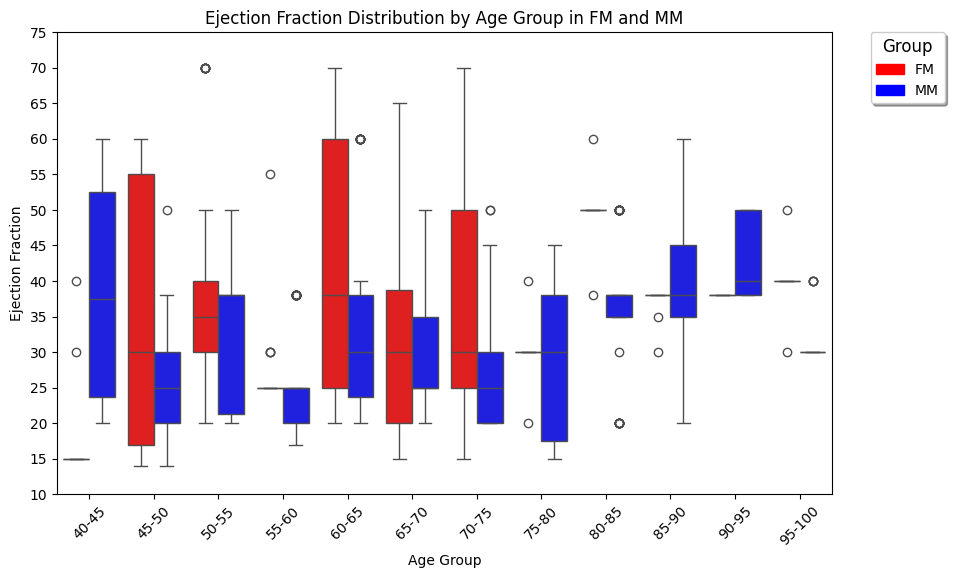

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load the dataframes
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")

# Add a 'Group' column to distinguish FM and MM
FM['Group'] = 'FM'  # FM = Female Mortality
MM['Group'] = 'MM'  # MM = Male Mortality

# Combine the dataframes
df = pd.concat([FM, MM])

# Define the age groups with 5-year intervals starting from 40
bins = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Define a color palette for 'Group' with 'FM' as red and 'MM' as blue
palette = {'FM': 'red', 'MM': 'blue'}

# Custom legend handles
legend_handles = [Patch(color='red', label='FM'), Patch(color='blue', label='MM')]

# Plot the distribution of ejection_fraction by age group
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='age_group', y='ejection_fraction', hue='Group', palette=palette)

# Set y-axis limits and ticks for ejection_fraction
ax.set_ylim(10, 75)
ax.set_yticks(range(10, 80, 5))  # Set y-axis ticks from 10 to 75 with intervals of 5

plt.xlabel("Age Group")
plt.ylabel("Ejection Fraction")
plt.title('Ejection Fraction Distribution by Age Group in FM and MM')
plt.xticks(rotation=45)

# Adjusting the legend to use custom handles
plt.legend(handles=legend_handles, title='Group', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=True, shadow=True)

plt.show()

# # Check the data type of the 'age' column in each dataframe
# print("Data type of 'age' in Female Survivors (FS):", FS['age'].dtype)
# print("Data type of 'age' in Female Deaths (FM):", FM['age'].dtype)
# print("Data type of 'age' in Male Deaths (MM):", MM['age'].dtype)
# print("Data type of 'age' in Male Survivors (MS):", MS['age'].dtype)

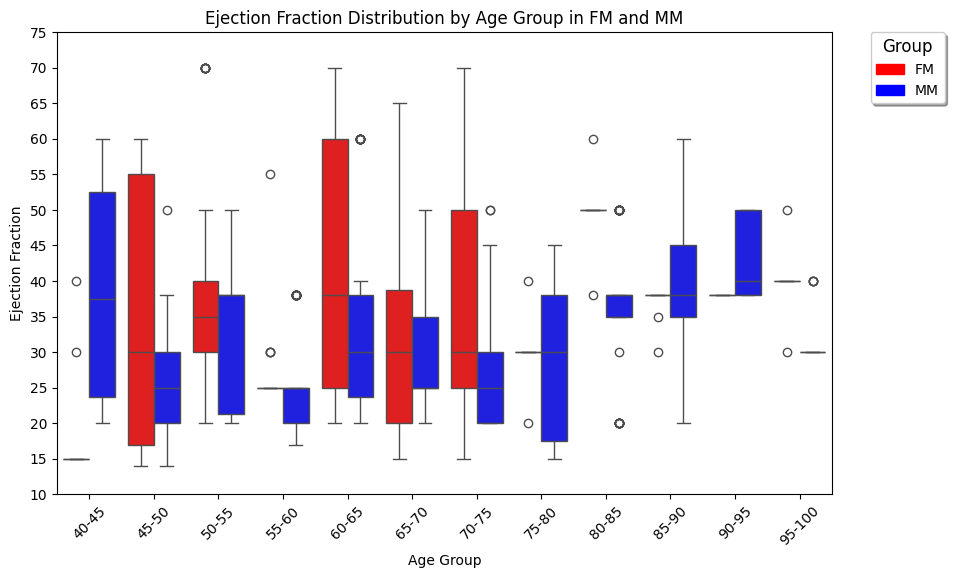

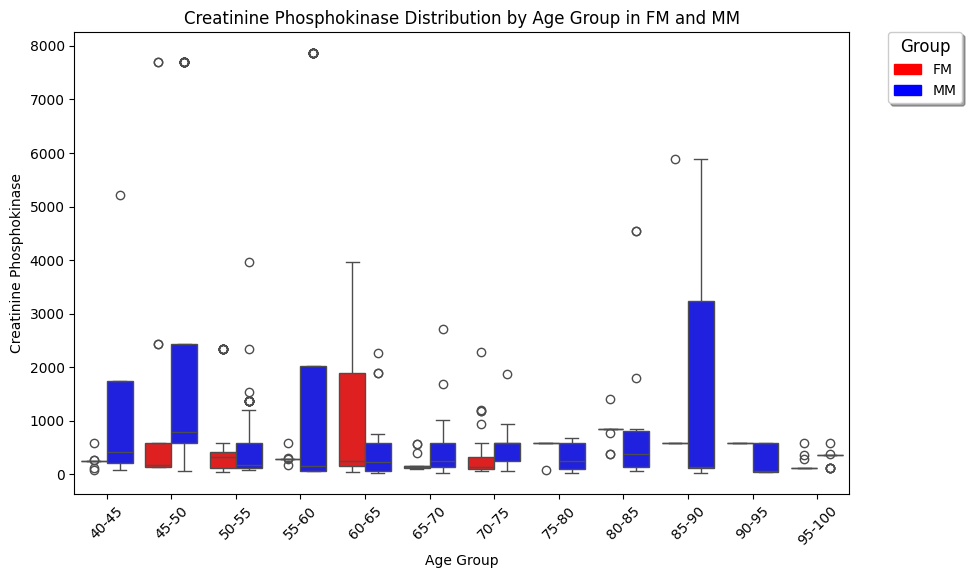

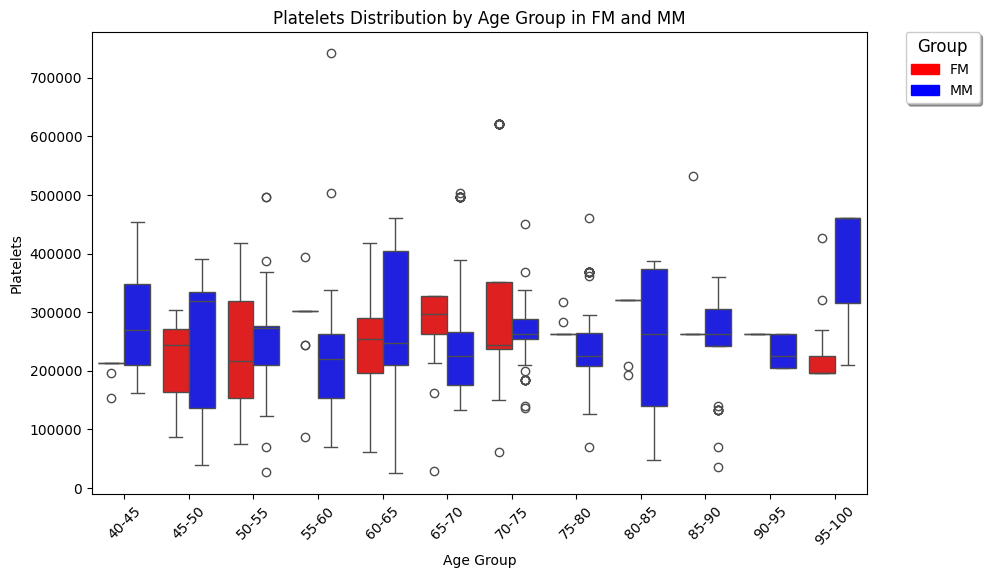

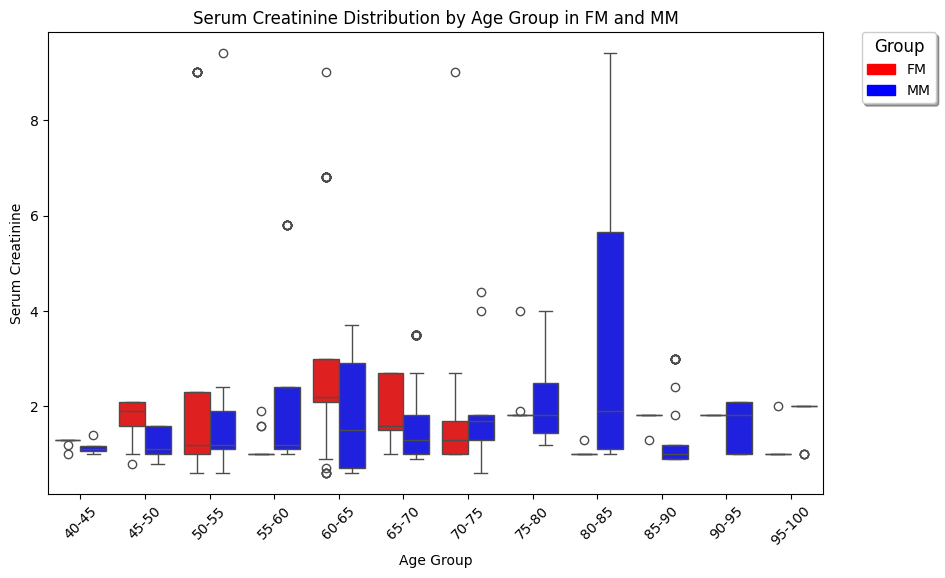

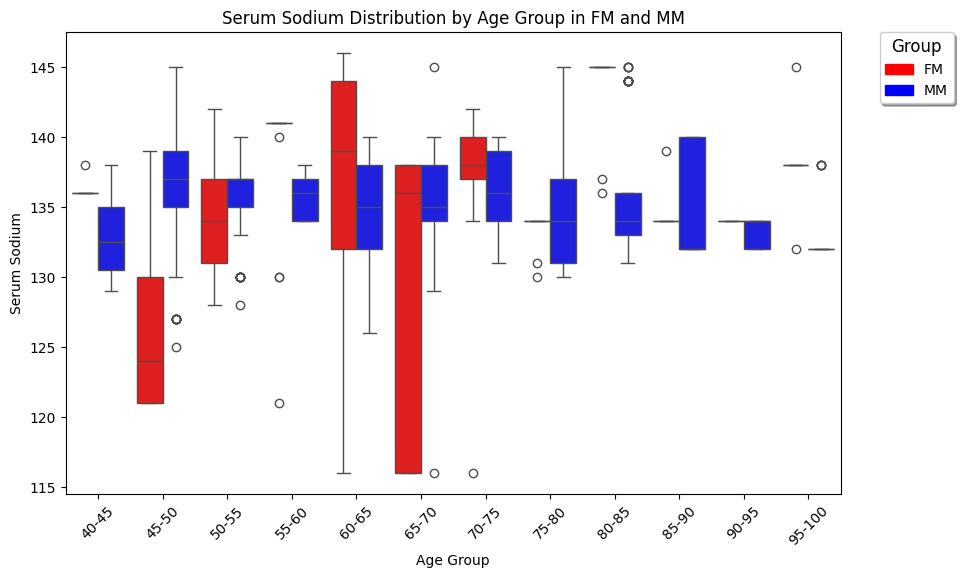

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load the dataframes
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")

# Add a 'Group' column to distinguish FM and MM
FM['Group'] = 'FM'  # FM = Female Mortality
MM['Group'] = 'MM'  # MM = Male Mortality

# Combine the dataframes
df = pd.concat([FM, MM])

# Define the age groups with 5-year intervals starting from 40
bins = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Define a color palette for 'Group' with 'FM' as red and 'MM' as blue
palette = {'FM': 'red', 'MM': 'blue'}

# Custom legend handles
legend_handles = [Patch(color='red', label='FM'), Patch(color='blue', label='MM')]

# List of continuous features
continuous_features = ['ejection_fraction', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']

# Plot the distribution of each continuous feature by age group
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(data=df, x='age_group', y=feature, hue='Group', palette=palette)

    # Customize y-axis limits and ticks for specific features if needed
    if feature == 'ejection_fraction':
        ax.set_ylim(10, 75)
        ax.set_yticks(range(10, 80, 5))  # Set y-axis ticks from 10 to 75 with intervals of 5

    plt.xlabel("Age Group")
    plt.ylabel(feature.replace('_', ' ').title())
    plt.title(f'{feature.replace("_", " ").title()} Distribution by Age Group in FM and MM')
    plt.xticks(rotation=45)

    # Adjusting the legend to use custom handles
    plt.legend(handles=legend_handles, title='Group', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=True, shadow=True)

    plt.show()


# New section

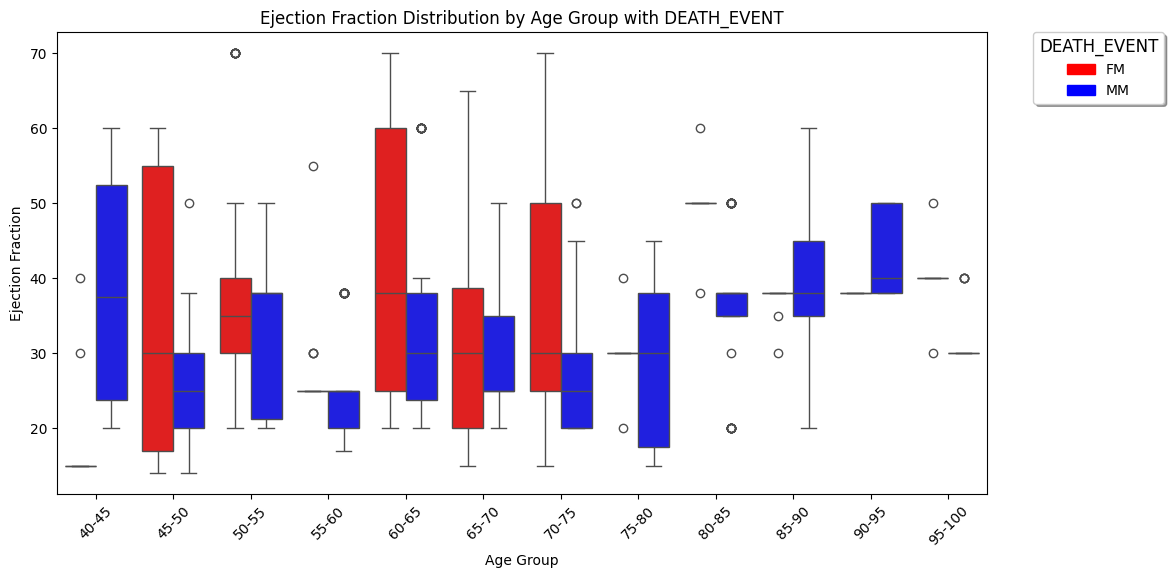

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


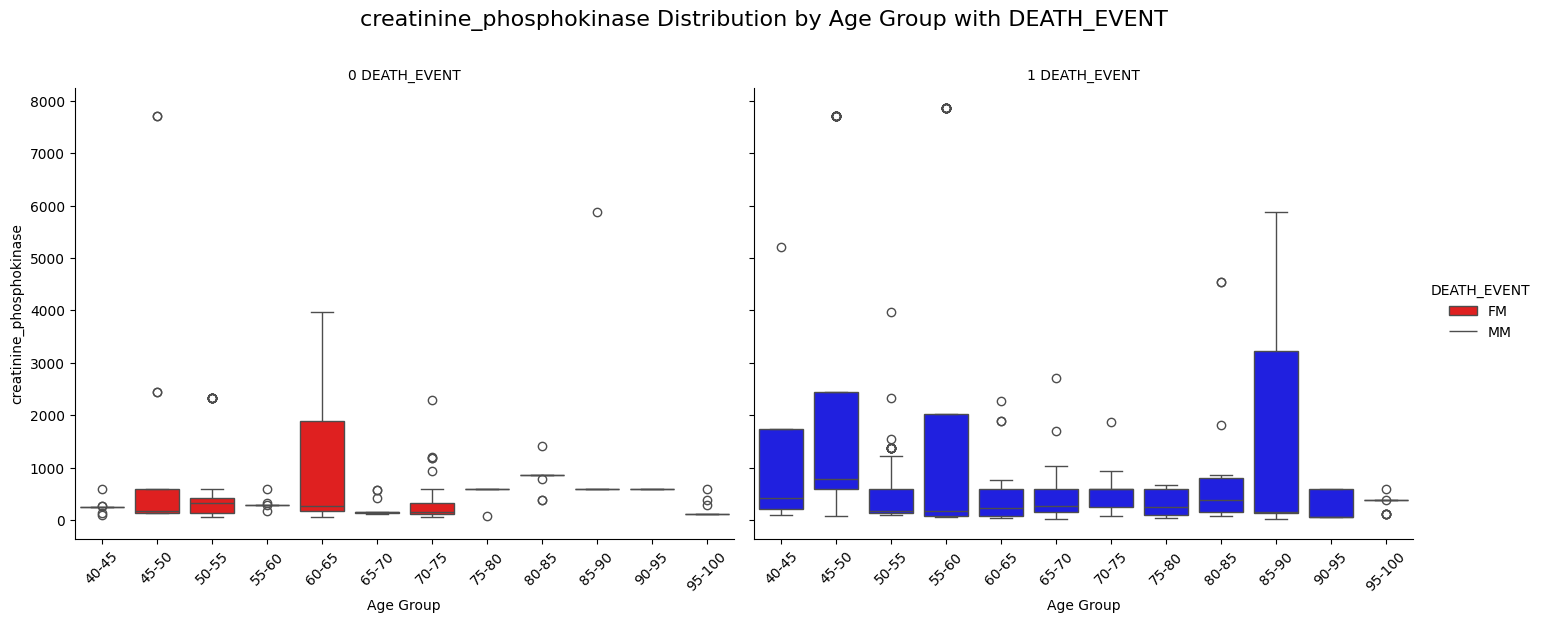

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


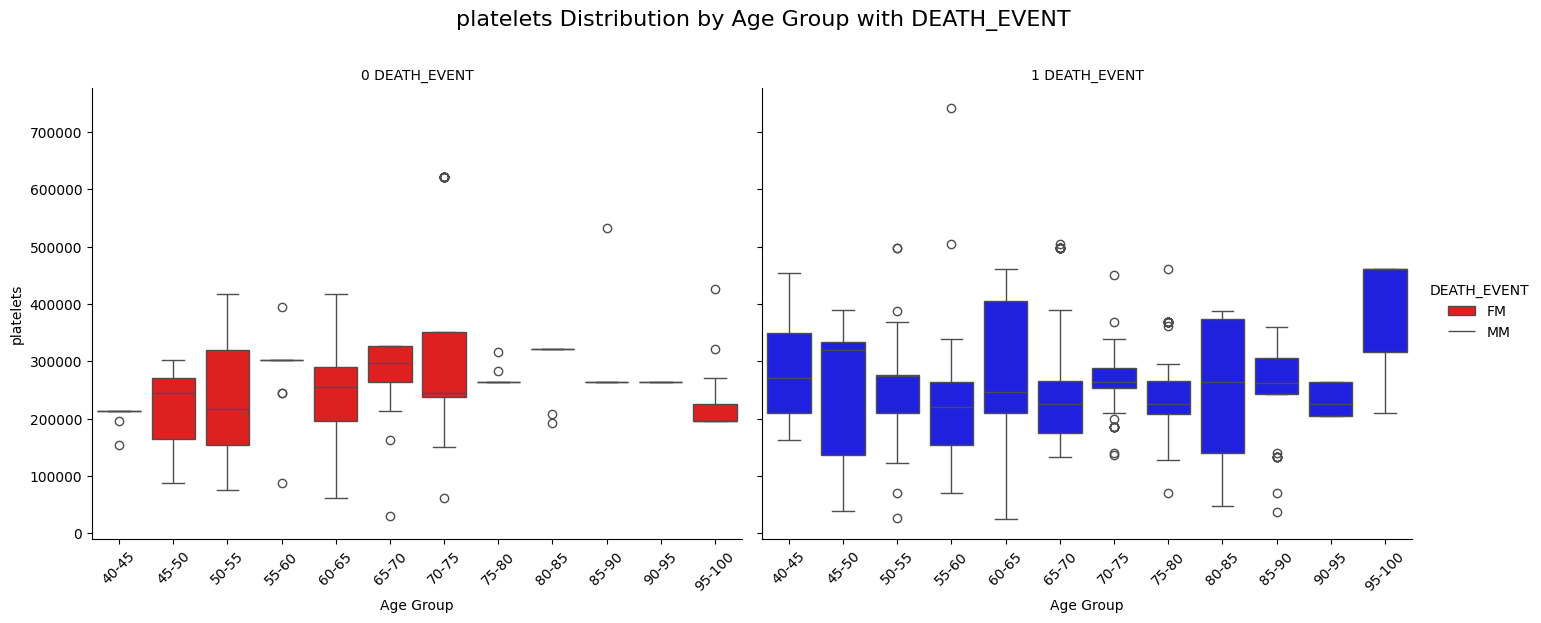

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


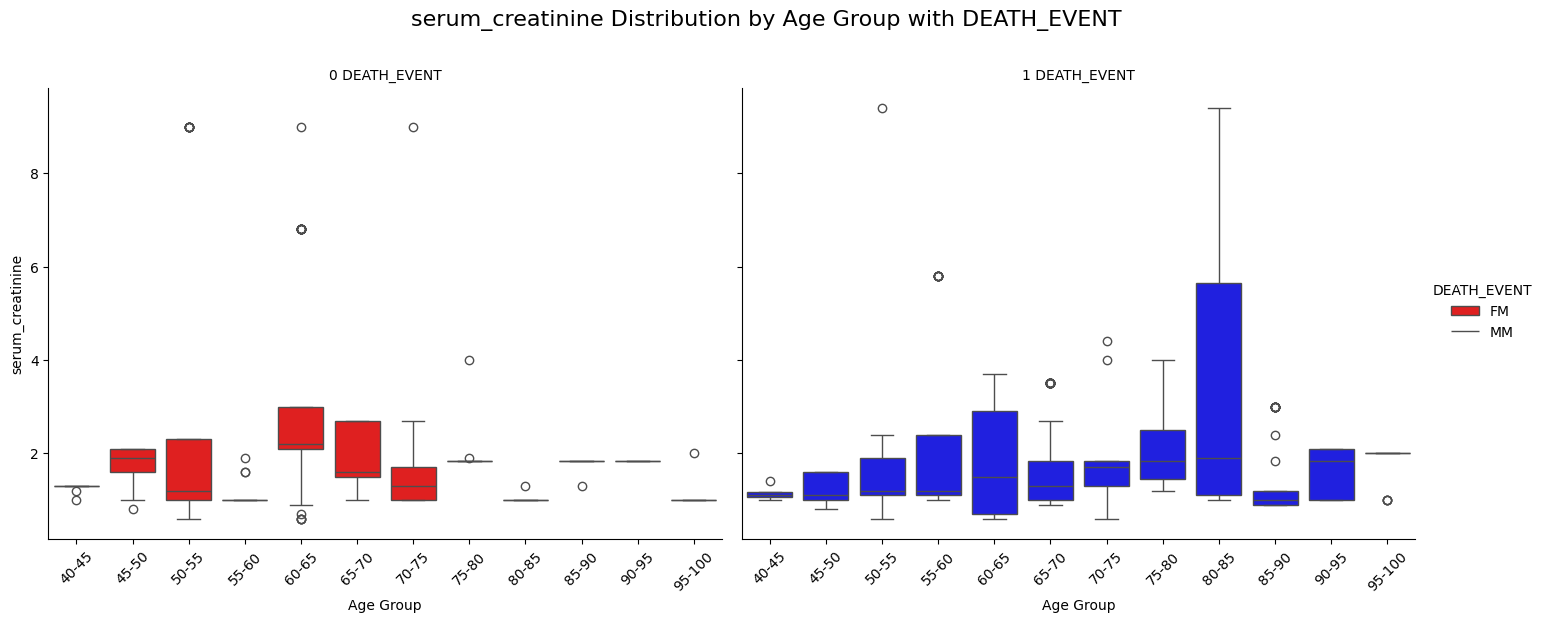

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


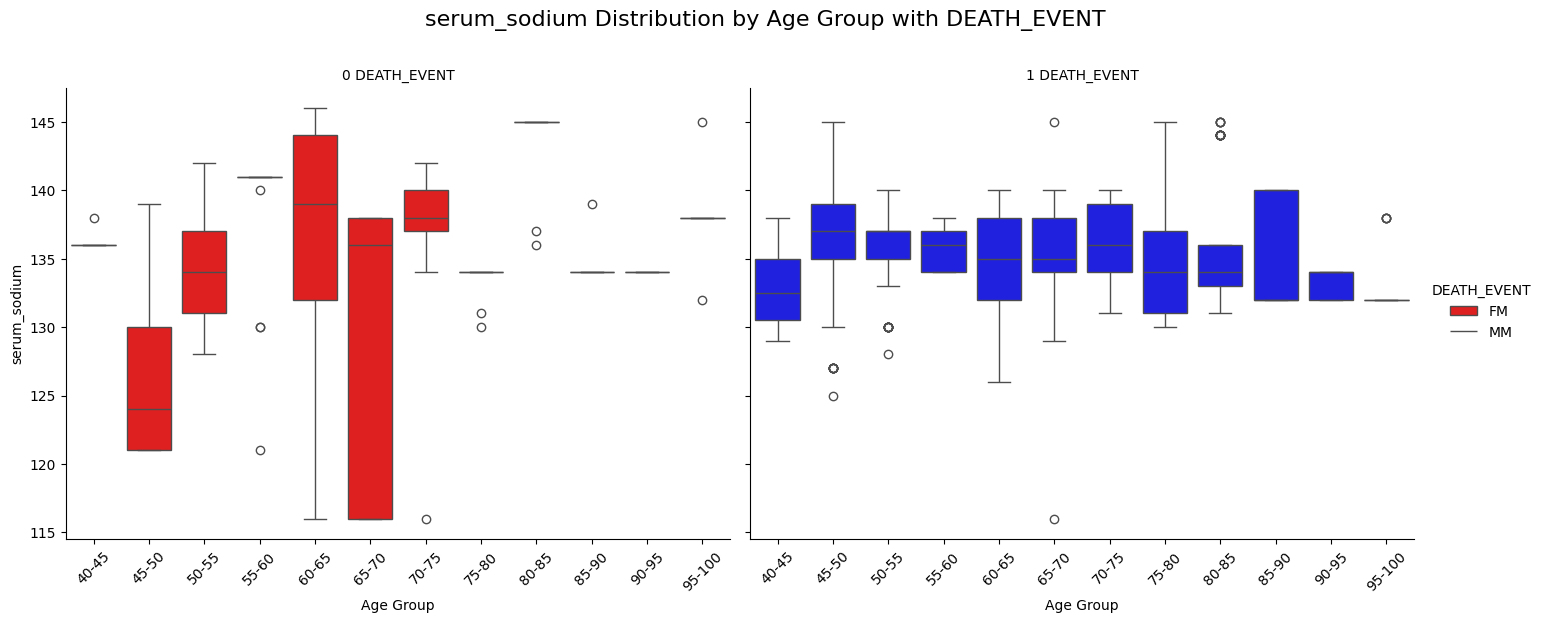

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


# Load the dataframes
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")

# Add a 'DEATH_EVENT' column to distinguish FM and MM
FM['DEATH_EVENT'] = 0  # FM = 0 (Female Mortality)
MM['DEATH_EVENT'] = 1  # MM = 1 (Male Mortality)

# Combine the dataframes
df = pd.concat([FM, MM])
legend_handles = [Patch(color='red', label='FM'), Patch(color='blue', label='MM')]


# Define the age groups with 5-year intervals starting from 40
bins = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Define a color palette for DEATH_EVENT with 'FM' as red and 'MM' as blue
palette = {0: 'red', 1: 'blue'}  # 0 for FM (Female Mortality), 1 for MM (Male Mortality)

# Plot the distribution of ejection_fraction by age group in one grid
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='age_group', y='ejection_fraction', hue='DEATH_EVENT', palette=palette)
plt.xlabel("Age Group")
plt.ylabel("Ejection Fraction")
plt.title("Ejection Fraction Distribution by Age Group with DEATH_EVENT")
plt.xticks(rotation=45)
#plt.legend(title='DEATH_EVENT', labels=['FM', 'MM'])  # Custom labels for the legend
plt.legend(handles=legend_handles, title='DEATH_EVENT', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=True, shadow=True)

plt.show()

# For other continuous features, keeping separate grids by sex
continuous_features = ['creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']  # Example features
for feature in continuous_features:
    g = sns.FacetGrid(df, col="DEATH_EVENT", height=6, aspect=1.2, palette=palette)
    g.map_dataframe(sns.boxplot, x='age_group', y=feature, hue='DEATH_EVENT', palette=palette)
    g.add_legend(title='DEATH_EVENT', labels=['FM', 'MM'])
    g.set_axis_labels("Age Group", feature)
    g.set_titles(col_template="{col_name} DEATH_EVENT")
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'{feature} Distribution by Age Group with DEATH_EVENT', fontsize=16)
    plt.show()


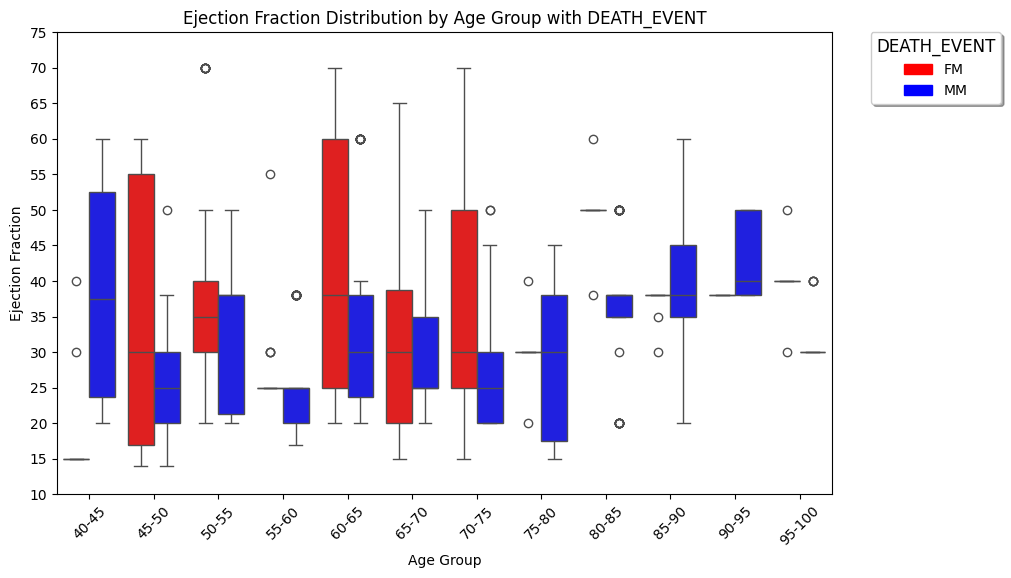

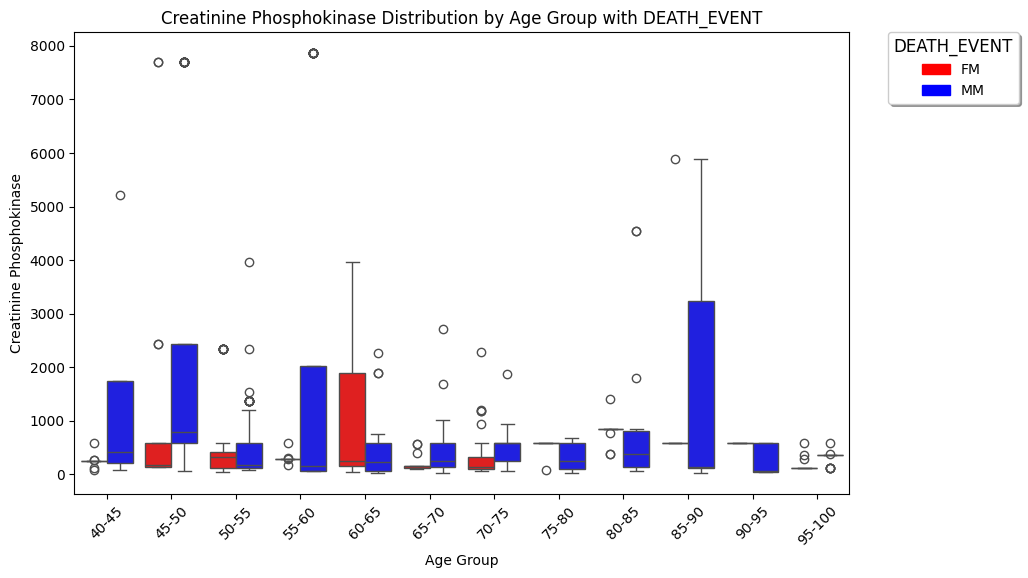

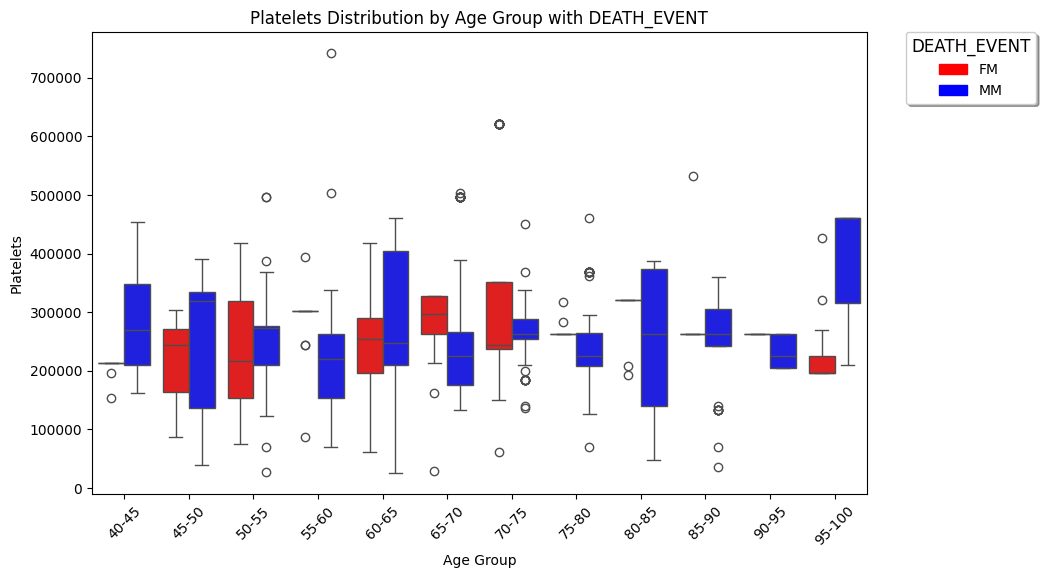

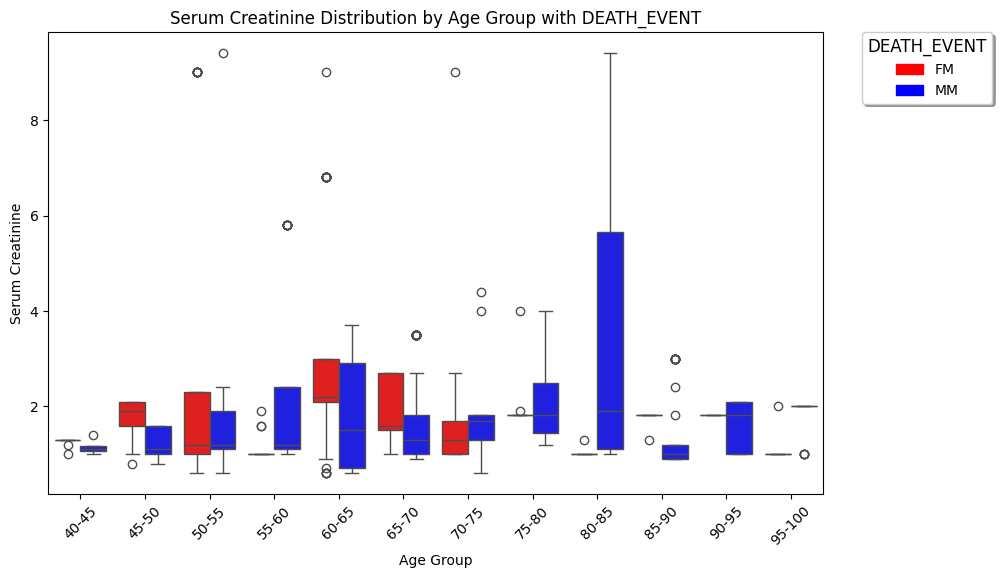

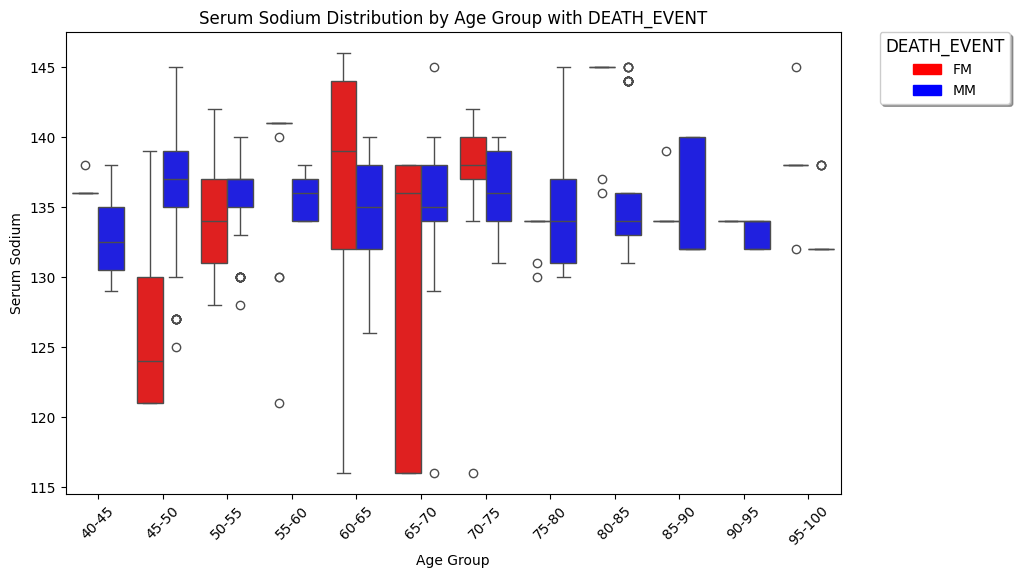

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load the dataframes
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")

# Add a 'DEATH_EVENT' column to distinguish FM and MM
FM['DEATH_EVENT'] = 0  # FM = 0 (Female Mortality)
MM['DEATH_EVENT'] = 1  # MM = 1 (Male Mortality)

# Combine the dataframes
df = pd.concat([FM, MM])

# Define the age groups with 5-year intervals starting from 40
bins = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Define a color palette for DEATH_EVENT with 'FM' as red and 'MM' as blue
palette = {0: 'red', 1: 'blue'}  # 0 for FM (Female Mortality), 1 for MM (Male Mortality)

# Custom legend handles
legend_handles = [Patch(color='red', label='FM'), Patch(color='blue', label='MM')]

# List of continuous features
continuous_features = ['ejection_fraction', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']

# Plot the distribution of all continuous features by age group in one grid
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(data=df, x='age_group', y=feature, hue='DEATH_EVENT', palette=palette)

    # Set y-axis limits and ticks specifically for ejection_fraction
    if feature == 'ejection_fraction':
        ax.set_ylim(10, 75)
        ax.set_yticks(range(10, 80, 5))  # Set y-axis ticks from 10 to 75 with intervals of 5

    plt.xlabel("Age Group")
    plt.ylabel(feature.replace('_', ' ').title())
    plt.title(f'{feature.replace("_", " ").title()} Distribution by Age Group with DEATH_EVENT')
    plt.xticks(rotation=45)
    # Adjusting the legend to use custom handles
    plt.legend(handles=legend_handles, title='DEATH_EVENT', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=True, shadow=True)
    plt.show()


In [ ]:
# Function to calculate additional statistics
def calculate_statistics(df):
    stats = pd.DataFrame({
        'Mean': df.mean(),
        'Median': df.median(),
        'Mode': df.mode().apply(lambda x: list(x.dropna()), axis=0),  # List all modes
        'Variance': df.var(),
        'Standard Deviation': df.std(),
        'Min': df.min(),
        'Max': df.max(),
        '25th Percentile': df.quantile(0.25),
        '50th Percentile': df.quantile(0.50),  # This is equivalent to the median
        '75th Percentile': df.quantile(0.75),
    })
    return stats

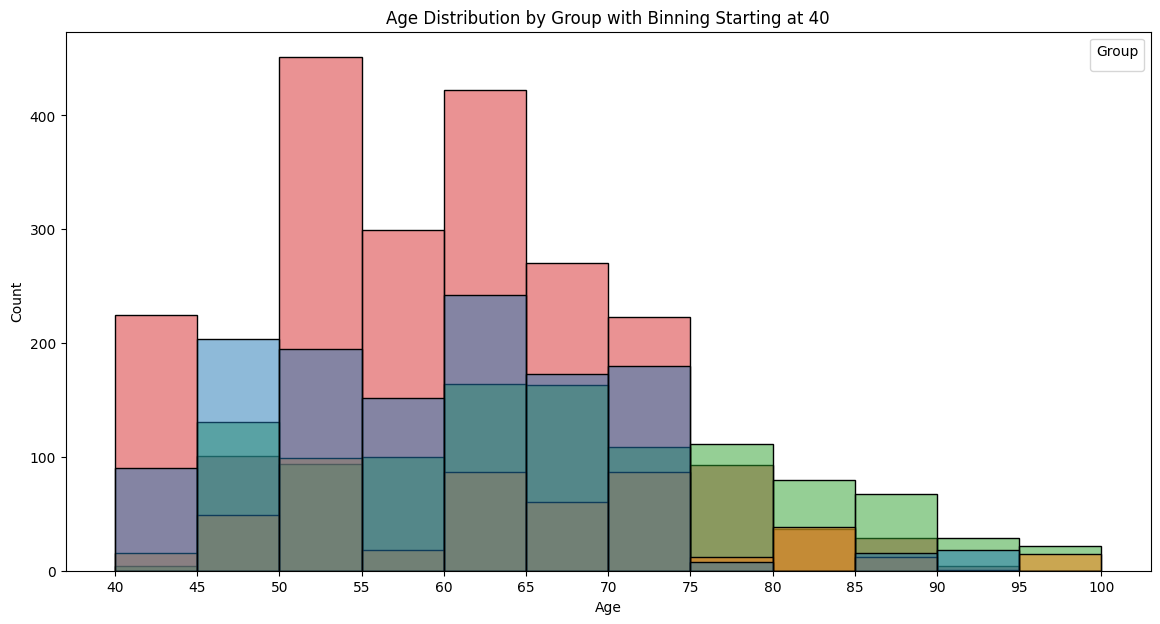

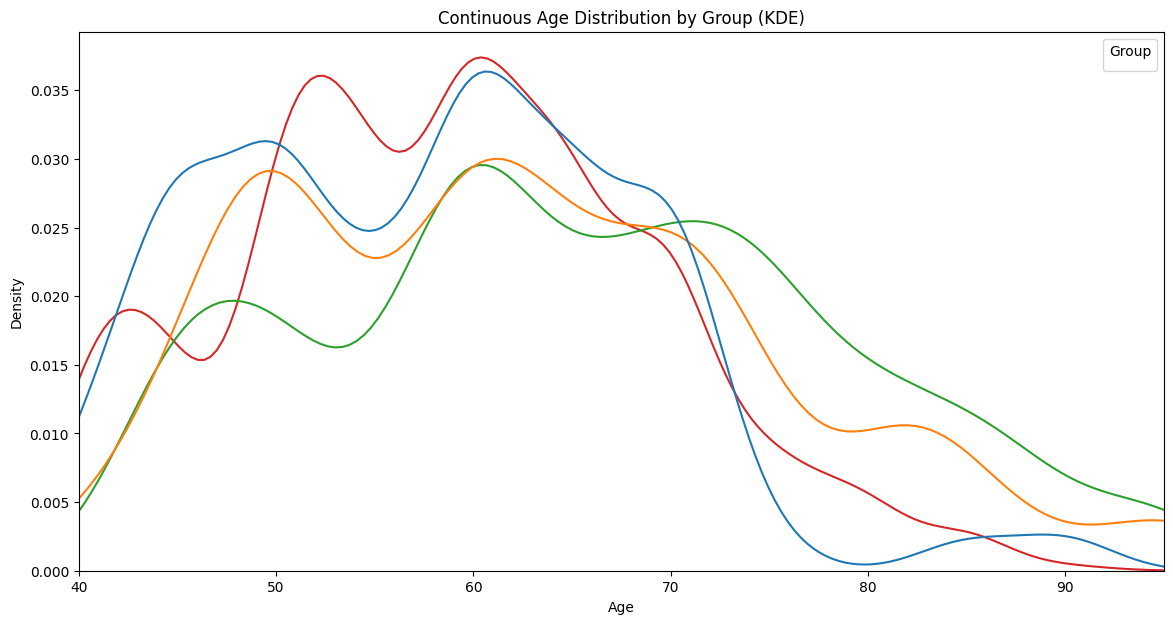

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FM = drop_unnamed_columns(FM)
MM = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Combine all dataframes into one for easier plotting
FS['Group'] = 'Female Survivors (FS)'
FM['Group'] = 'Female Deaths (FM)'
MM['Group'] = 'Male Deaths (MM)'
MS['Group'] = 'Male Survivors (MS)'

combined_df = pd.concat([FS, FM, MM, MS])

# Histogram with Age Bins Starting at 40
plt.figure(figsize=(14, 7))
age_bins = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
sns.histplot(data=combined_df, x='age', hue='Group', bins=age_bins, kde=False, element='bars')
plt.title('Age Distribution by Group with Binning Starting at 40')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(age_bins)
plt.legend(title='Group')
plt.show()

# KDE Plot (No Binning)
plt.figure(figsize=(14, 7))
sns.kdeplot(data=combined_df, x='age', hue='Group', common_norm=False)
plt.title('Continuous Age Distribution by Group (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xlim(40, combined_df['age'].max())
plt.legend(title='Group')
plt.show()


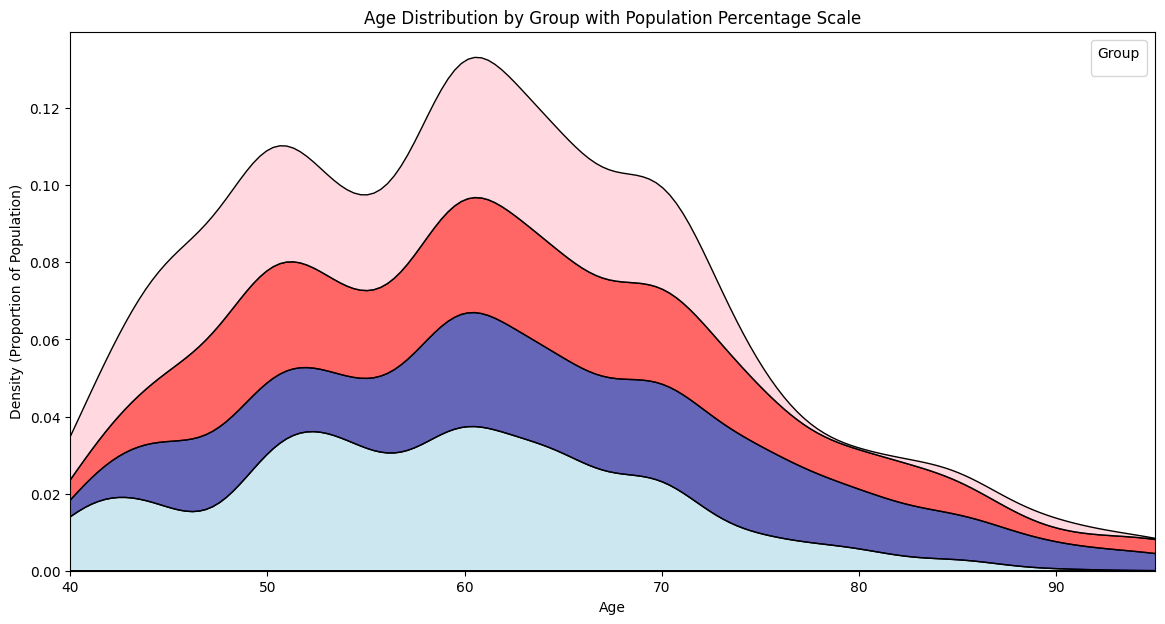

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FM = drop_unnamed_columns(FM)
MM = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Combine all dataframes into one for easier plotting
FS['Group'] = 'Female Survivors (FS)'
FM['Group'] = 'Female Deaths (FM)'
MM['Group'] = 'Male Deaths (MM)'
MS['Group'] = 'Male Survivors (MS)'

combined_df = pd.concat([FS, FM, MM, MS])

# Define the color scheme
custom_palette = {
    'Female Survivors (FS)': 'pink',
    'Female Deaths (FM)': 'red',
    'Male Deaths (MM)': 'darkblue',
    'Male Survivors (MS)': 'lightblue'
}

# KDE Plot with the percentage proportion as the density scale
plt.figure(figsize=(14, 7))
sns.kdeplot(data=combined_df, x='age', hue='Group', common_norm=False, fill=True, palette=custom_palette, multiple="stack", alpha=0.6)
plt.title('Age Distribution by Group with Population Percentage Scale')
plt.xlabel('Age')
plt.ylabel('Density (Proportion of Population)')
plt.xlim(40, combined_df['age'].max())

# Show the legend
plt.legend(title='Group', loc='upper right', fontsize=12)
plt.show()


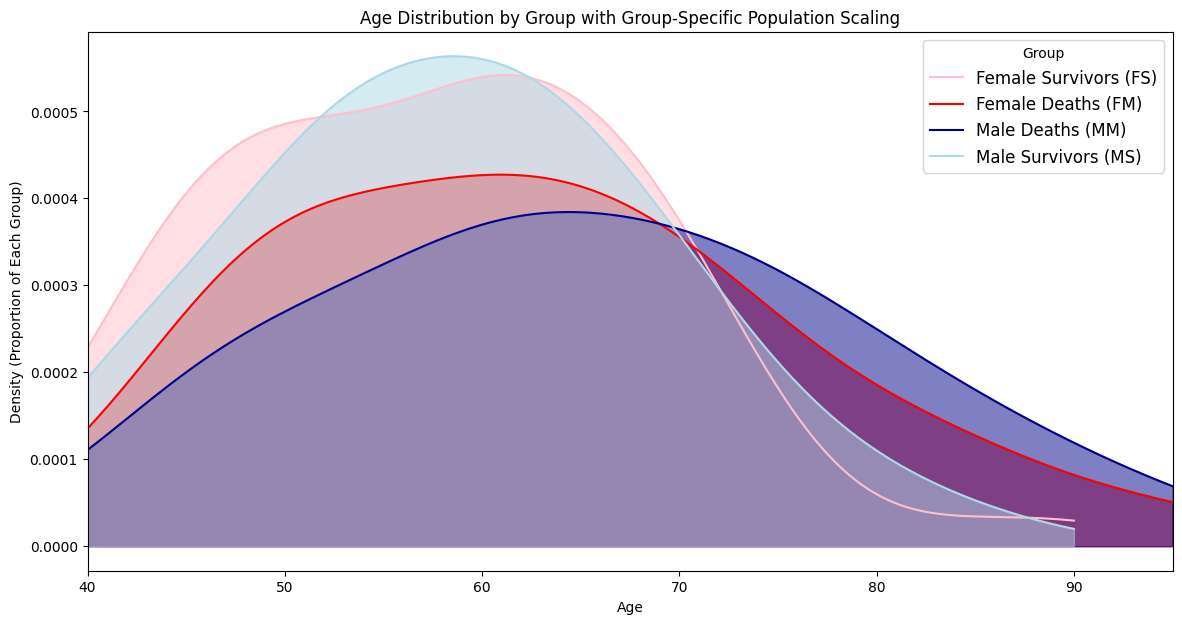

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FM = drop_unnamed_columns(FM)
MM = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Function to calculate KDE
def calculate_kde(df, total_count):
    density = gaussian_kde(df['age'], bw_method=0.5)
    xs = np.linspace(40, df['age'].max(), 200)
    density_values = density(xs) * (total_count / df['age'].sum())  # Scale by population proportion
    return xs, density_values

# Calculate KDE for each group
FS_xs, FS_density = calculate_kde(FS, len(FS))
FM_xs, FM_density = calculate_kde(FM, len(FM))
MM_xs, MM_density = calculate_kde(MM, len(MM))
MS_xs, MS_density = calculate_kde(MS, len(MS))

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(FS_xs, FS_density, color='pink', label='Female Survivors (FS)')
plt.fill_between(FS_xs, FS_density, color='pink', alpha=0.5)

plt.plot(FM_xs, FM_density, color='red', label='Female Deaths (FM)')
plt.fill_between(FM_xs, FM_density, color='red', alpha=0.5)

plt.plot(MM_xs, MM_density, color='darkblue', label='Male Deaths (MM)')
plt.fill_between(MM_xs, MM_density, color='darkblue', alpha=0.5)

plt.plot(MS_xs, MS_density, color='lightblue', label='Male Survivors (MS)')
plt.fill_between(MS_xs, MS_density, color='lightblue', alpha=0.5)

# Adjust titles and labels
plt.title('Age Distribution by Group with Group-Specific Population Scaling')
plt.xlabel('Age')
plt.ylabel('Density (Proportion of Each Group)')
plt.xlim(40, combined_df['age'].max())

# Show the legend
plt.legend(title='Group', loc='upper right', fontsize=12)
plt.show()


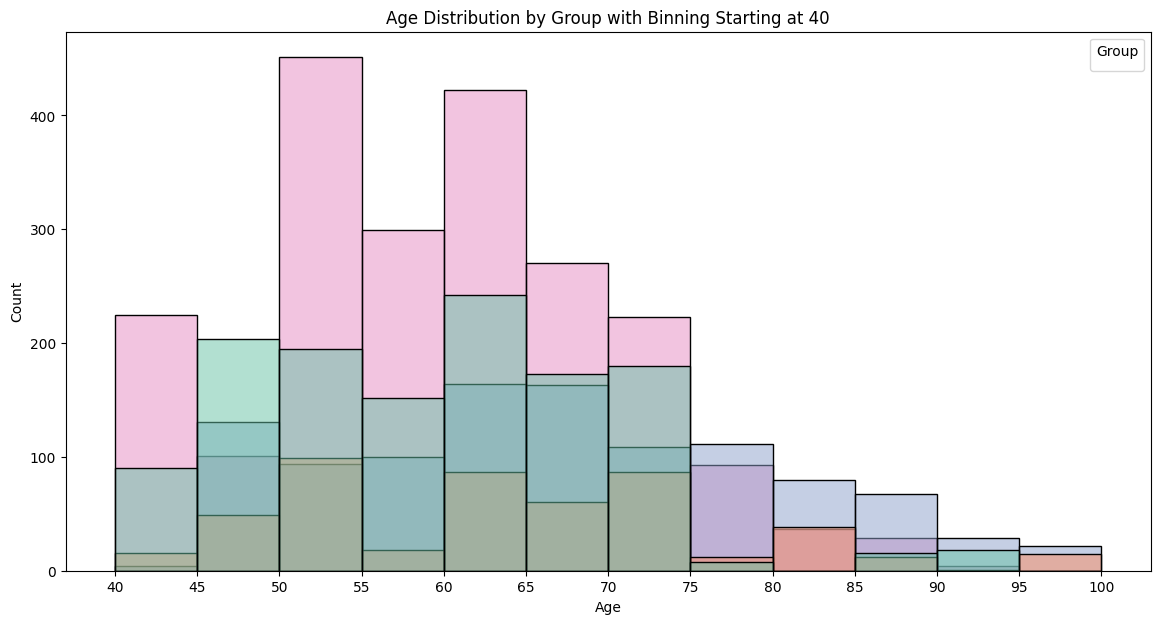

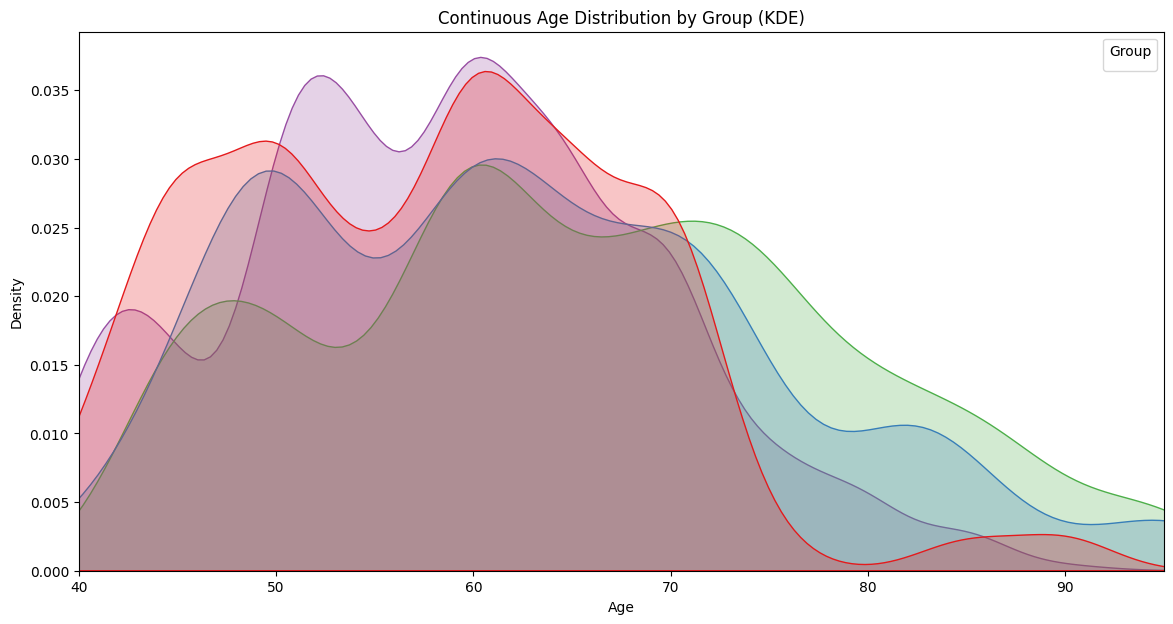

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FM = drop_unnamed_columns(FM)
MM = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Combine all dataframes into one for easier plotting
FS['Group'] = 'Female Survivors (FS)'
FM['Group'] = 'Female Deaths (FM)'
MM['Group'] = 'Male Deaths (MM)'
MS['Group'] = 'Male Survivors (MS)'

combined_df = pd.concat([FS, FM, MM, MS])

# Histogram with Age Bins Starting at 40
plt.figure(figsize=(14, 7))
age_bins = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
sns.histplot(data=combined_df, x='age', hue='Group', bins=age_bins, kde=False, element='bars', palette='Set2')
plt.title('Age Distribution by Group with Binning Starting at 40')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(age_bins)
plt.legend(title='Group')
plt.show()

# KDE Plot (No Binning) with Fill and Distinct Colors
plt.figure(figsize=(14, 7))
sns.kdeplot(data=combined_df, x='age', hue='Group', common_norm=False, fill=True, palette='Set1')
plt.title('Continuous Age Distribution by Group (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xlim(40, combined_df['age'].max())
plt.legend(title='Group')
plt.show()


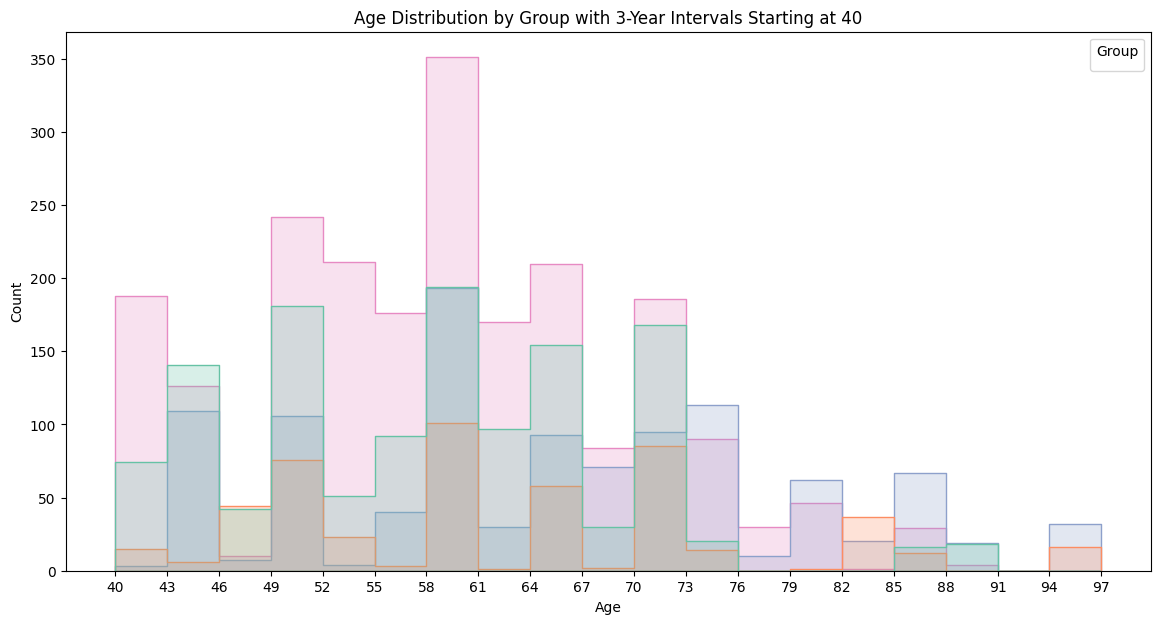

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FM = drop_unnamed_columns(FM)
MM = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Round the age column to the nearest integer
FS['age'] = FS['age'].round().astype(int)
FM['age'] = FM['age'].round().astype(int)
MM['age'] = MM['age'].round().astype(int)
MS['age'] = MS['age'].round().astype(int)

# Combine all dataframes into one for easier plotting
FS['Group'] = 'Female Survivors (FS)'
FM['Group'] = 'Female Deaths (FM)'
MM['Group'] = 'Male Deaths (MM)'
MS['Group'] = 'Male Survivors (MS)'

combined_df = pd.concat([FS, FM, MM, MS])

# Define bins with a 3-year interval starting from 40
bins = list(range(40, combined_df['age'].max() + 3, 3))

# Plot histogram
plt.figure(figsize=(14, 7))
sns.histplot(data=combined_df, x='age', hue='Group', bins=bins, element='step', palette='Set2')
plt.title('Age Distribution by Group with 3-Year Intervals Starting at 40')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(bins)
plt.legend(title='Group')
plt.show()


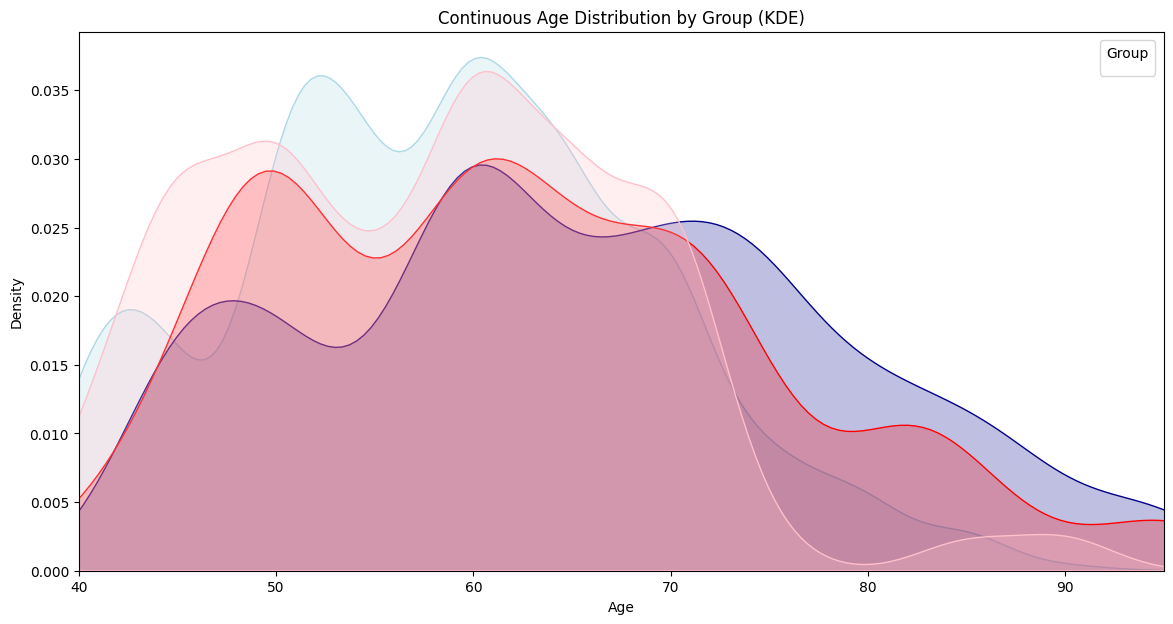

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FM = drop_unnamed_columns(FM)
MM = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Combine all dataframes into one for easier plotting
FS['Group'] = 'Female Survivors (FS)'
FM['Group'] = 'Female Deaths (FM)'
MM['Group'] = 'Male Deaths (MM)'
MS['Group'] = 'Male Survivors (MS)'

combined_df = pd.concat([FS, FM, MM, MS])

# Define the color scheme
custom_palette = {
    'Female Survivors (FS)': 'pink',
    'Female Deaths (FM)': 'red',
    'Male Deaths (MM)': 'darkblue',
    'Male Survivors (MS)': 'lightblue'
}

# KDE Plot (No Binning) with Fill and Custom Colors
plt.figure(figsize=(14, 7))
sns.kdeplot(data=combined_df, x='age', hue='Group', common_norm=False, fill=True, palette=custom_palette)
plt.title('Continuous Age Distribution by Group (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xlim(40, combined_df['age'].max())

# Explicitly show the legend
plt.legend(title='Group', loc='upper right', fontsize=12)
plt.show()


In [ ]:
import pandas as pd

# Load the dataframes
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FM = drop_unnamed_columns(FM)
MM = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Function to calculate statistics
def calculate_statistics(df):
    mode_df = df.mode().iloc[:3].transpose()
    mode_df.columns = [f'Mode {i+1}' for i in range(len(mode_df.columns))]

    stats = pd.DataFrame({
        'Mean': df.mean(),
        'Median': df.median(),
        'Variance': df.var(),
        'Standard Deviation': df.std(),
        'Min': df.min(),
        'Max': df.max(),
        '25th Percentile': df.quantile(0.25),
        '50th Percentile': df.quantile(0.50),  # This is equivalent to the median
        '75th Percentile': df.quantile(0.75),
    }).transpose()

    stats = stats.join(mode_df)

    return stats

# Calculate statistics for each dataframe
FS_stats = calculate_statistics(FS)
FM_stats = calculate_statistics(FM)
MM_stats = calculate_statistics(MM)
MS_stats = calculate_statistics(MS)

# Display the results
print("Statistics for Female Survivors (FS):")
print(FS_stats)
print("\nStatistics for Female Deaths (FM):")
print(FM_stats)
print("\nStatistics for Male Deaths (MM):")
print(MM_stats)
print("\nStatistics for Male Survivors (MS):")
print(MS_stats)


Statistics for Female Survivors (FS):
                           age   anaemia  creatinine_phosphokinase  diabetes  \
Mean                 57.795261  0.485915                474.107981  0.510172   
Median               58.000000  0.000000                217.000000  1.000000   
Variance            108.890918  0.249997             359807.795692  0.250092   
Standard Deviation   10.435081  0.499997                599.839808  0.500092   
Min                  40.000000  0.000000                 25.000000  0.000000   
Max                  90.000000  1.000000               7702.000000  1.000000   
25th Percentile      50.000000  0.000000                101.000000  0.000000   
50th Percentile      58.000000  0.000000                217.000000  1.000000   
75th Percentile      65.000000  1.000000                582.000000  1.000000   

                    ejection_fraction  high_blood_pressure     platelets  \
Mean                        40.462441             0.375587  2.810296e+05   
Median   

In [ ]:
import pandas as pd

# # Load the data
# FS = pd.read_csv("femaleSurvivors.csv")
# FD = pd.read_csv("femaleDeath.csv")
# MD = pd.read_csv("MaleDeaths.csv")
# MS = pd.read_csv("MaleSurvivor.csv")

# Function to calculate additional statistics
def calculate_statistics(df):
    stats = pd.DataFrame({
        'Mean': df.mean(),
        'Median': df.median(),
        'Mode': df.mode().iloc[0],  # Mode can have multiple values; we take the first one
        'Variance': df.var()
    })
    return stats


# Calculate and display statistics for each dataframe
def display_statistics(df, name):
    print(f"\nDescriptive Statistics for {name}:")
    print(df.describe())

    print(f"\nAdditional Statistics for {name}:")
    stats = calculate_statistics(df)
    print(stats)

# Display statistics for each dataframe
display_statistics(FS, "Female Survivors (FS)")
display_statistics(FD, "Female Deaths (FD)")
display_statistics(MD, "Male Deaths (MD)")
display_statistics(MS, "Male Survivors (MS)")



Descriptive Statistics for Female Survivors (FS):
               age      anaemia  creatinine_phosphokinase     diabetes  \
count  1278.000000  1278.000000               1278.000000  1278.000000   
mean     57.795261     0.485915                474.107981     0.510172   
std      10.435081     0.499997                599.839808     0.500092   
min      40.000000     0.000000                 25.000000     0.000000   
25%      50.000000     0.000000                101.000000     0.000000   
50%      58.000000     0.000000                217.000000     1.000000   
75%      65.000000     1.000000                582.000000     1.000000   
max      90.000000     1.000000               7702.000000     1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count        1278.000000          1278.000000    1278.000000   
mean           40.462441             0.375587  281029.557527   
std            10.721056             0.484464   91828.180940   
min            20.000000  

ValueError: Data must be 1-dimensional, got ndarray of shape (1, 10) instead

In [ ]:
import pandas as pd

# # Load the data
# FS = pd.read_csv("femaleSurvivors.csv")
# FD = pd.read_csv("femaleDeath.csv")
# MD = pd.read_csv("MaleDeaths.csv")
# MS = pd.read_csv("MaleSurvivor.csv")

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FD = drop_unnamed_columns(FD)
MD = drop_unnamed_columns(MD)
MS = drop_unnamed_columns(MS)

# Function to calculate statistics
def calculate_statistics(df):
    stats = pd.DataFrame({
        'Mean': df.mean(),
        'Median': df.median(),
        'Mode': df.mode().iloc[0],  # Mode can have multiple values; we take the first one
        'Variance': df.var()
    })
    return stats

# Calculate statistics for each dataframe
FS_stats = calculate_statistics(FS)
FD_stats = calculate_statistics(FD)
MD_stats = calculate_statistics(MD)
MS_stats = calculate_statistics(MS)

# Display the results
print("Statistics for Female Survivors (FS):")
print(FS_stats)
print("\nStatistics for Female Deaths (FD):")
print(FD_stats)
print("\nStatistics for Male Deaths (MD):")
print(MD_stats)
print("\nStatistics for Male Survivors (MS):")
print(MS_stats)


Statistics for Female Survivors (FS):
                                   Mean    Median       Mode      Variance
age                           57.795261      58.0      70.00  1.088909e+02
anaemia                        0.485915       0.0       0.00  2.499972e-01
creatinine_phosphokinase     474.107981     217.0     582.00  3.598078e+05
diabetes                       0.510172       1.0       1.00  2.500922e-01
ejection_fraction             40.462441      40.0      40.00  1.149410e+02
high_blood_pressure            0.375587       0.0       0.00  2.347050e-01
platelets                 281029.557527  270000.0  263358.03  8.432415e+09
serum_creatinine               1.086455       1.0       0.90  2.741161e-01
serum_sodium                 137.857590     138.0     136.00  1.324360e+01
sex                            0.000000       0.0       0.00  0.000000e+00
smoking                        0.014867       0.0       0.00  1.465742e-02
time                         156.450704     172.0     187.00  

In [ ]:
import pandas as pd

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FD = drop_unnamed_columns(FM)
MD = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Function to calculate statistics
def calculate_statistics(df):
    stats = pd.DataFrame({
        'Mean': df.mean(),
        'Median': df.median(),
        'Mode': df.mode().iloc[0],  # Mode can have multiple values; we take the first one
        'Variance': df.var()
    })
    return stats

# Calculate statistics for each dataframe
FS_stats = calculate_statistics(FS)
FD_stats = calculate_statistics(FD)
MD_stats = calculate_statistics(MD)
MS_stats = calculate_statistics(MS)

# Combine statistics for easier comparison variable-wise
combined_stats = pd.concat(
    [FS_stats.rename(columns=lambda x: 'FS_' + x),
     FD_stats.rename(columns=lambda x: 'FD_' + x),
     MD_stats.rename(columns=lambda x: 'MD_' + x),
     MS_stats.rename(columns=lambda x: 'MS_' + x)],
    axis=1
)

# Display the results for each population
print("Statistics for Female Survivors (FS):")
print(FS_stats)
print("\nStatistics for Female Deaths (FD):")
print(FD_stats)
print("\nStatistics for Male Deaths (MD):")
print(MD_stats)
print("\nStatistics for Male Survivors (MS):")
print(MS_stats)

# Display the results for each variable across all populations
print("\nCombined Statistics for All Variables:")
print(combined_stats)


Statistics for Female Survivors (FS):
                                   Mean    Median       Mode      Variance
age                           57.795261      58.0      70.00  1.088909e+02
anaemia                        0.485915       0.0       0.00  2.499972e-01
creatinine_phosphokinase     474.107981     217.0     582.00  3.598078e+05
diabetes                       0.510172       1.0       1.00  2.500922e-01
ejection_fraction             40.462441      40.0      40.00  1.149410e+02
high_blood_pressure            0.375587       0.0       0.00  2.347050e-01
platelets                 281029.557527  270000.0  263358.03  8.432415e+09
serum_creatinine               1.086455       1.0       0.90  2.741161e-01
serum_sodium                 137.857590     138.0     136.00  1.324360e+01
sex                            0.000000       0.0       0.00  0.000000e+00
smoking                        0.014867       0.0       0.00  1.465742e-02
time                         156.450704     172.0     187.00  

In [ ]:
import pandas as pd

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FM = drop_unnamed_columns(FM)
MM = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Function to calculate detailed statistics for the 'age' variable
def calculate_age_statistics(df, group_name):
    age_data = df['age']
    stats = {
        'Mean': age_data.mean(),
        'Median': age_data.median(),
        'Mode_1st': age_data.mode().iloc[0] if not age_data.mode().empty else None,
        'Mode_2nd': age_data.mode().iloc[1] if len(age_data.mode()) > 1 else None,
        'Mode_3rd': age_data.mode().iloc[2] if len(age_data.mode()) > 2 else None,
        'Standard Deviation': age_data.std(),
        'Variance': age_data.var(),
        '25th Percentile': age_data.quantile(0.25),
        '50th Percentile': age_data.quantile(0.50),  # Same as median
        '75th Percentile': age_data.quantile(0.75),
        'Min': age_data.min(),
        'Max': age_data.max(),
        'Count': age_data.count()
    }
    return pd.DataFrame(stats, index=[group_name])

# Calculate age statistics for each group
FS_age_stats = calculate_age_statistics(FS, 'Female Survivors (FS)')
FM_age_stats = calculate_age_statistics(FM, 'Female Deaths (FM)')
MM_age_stats = calculate_age_statistics(MM, 'Male Deaths (MM)')
MS_age_stats = calculate_age_statistics(MS, 'Male Survivors (MS)')

# Combine all statistics into one DataFrame for comparison
combined_age_stats = pd.concat([FS_age_stats, FM_age_stats, MM_age_stats, MS_age_stats])

# Display the results
print("Detailed Statistics for the 'Age' Variable Across All Populations:")
print(combined_age_stats)


Detailed Statistics for the 'Age' Variable Across All Populations:
                            Mean  Median  Mode_1st Mode_2nd Mode_3rd  \
Female Survivors (FS)  57.795261    58.0      70.0     None     None   
Female Deaths (FM)     62.629555    60.0      60.0     None     None   
Male Deaths (MM)       65.513661    65.0      60.0     None     None   
Male Survivors (MS)    58.626122    60.0      60.0     None     None   

                       Standard Deviation    Variance  25th Percentile  \
Female Survivors (FS)           10.435081  108.890918            50.00   
Female Deaths (FM)              12.702175  161.345251            50.00   
Male Deaths (MM)                13.213144  174.587163            55.75   
Male Survivors (MS)             10.383601  107.819174            51.00   

                       50th Percentile  75th Percentile   Min   Max  Count  
Female Survivors (FS)             58.0             65.0  40.0  90.0   1278  
Female Deaths (FM)                60.0         

In [ ]:
import pandas as pd

# Function to drop 'Unnamed' columns if they exist
def drop_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Apply the function to remove 'Unnamed' columns
FS = drop_unnamed_columns(FS)
FM = drop_unnamed_columns(FM)
MM = drop_unnamed_columns(MM)
MS = drop_unnamed_columns(MS)

# Define age bins with 5-year intervals starting from 40
age_bins = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
age_labels = ['40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-100']

# Function to calculate statistics including mode based on age bins
def calculate_binned_statistics(df, bins, labels, group_name):
    age_binned = pd.cut(df['age'], bins=bins, labels=labels, right=False)
    mode_binned = age_binned.mode().iloc[0] if not age_binned.mode().empty else None
    stats = {
        'Mean': df['age'].mean(),
        'Median': df['age'].median(),
        'Mode (Binned)': mode_binned,
        'Standard Deviation': df['age'].std(),
        'Variance': df['age'].var(),
        '25th Percentile': df['age'].quantile(0.25),
        '50th Percentile': df['age'].quantile(0.50),
        '75th Percentile': df['age'].quantile(0.75),
        'Min': df['age'].min(),
        'Max': df['age'].max(),
        'Count': df['age'].count()
    }
    return pd.DataFrame(stats, index=[group_name])

# Calculate statistics for each group
FS_stats_binned = calculate_binned_statistics(FS, age_bins, age_labels, 'Female Survivors (FS)')
FM_stats_binned = calculate_binned_statistics(FM, age_bins, age_labels, 'Female Deaths (FM)')
MM_stats_binned = calculate_binned_statistics(MM, age_bins, age_labels, 'Male Deaths (MM)')
MS_stats_binned = calculate_binned_statistics(MS, age_bins, age_labels, 'Male Survivors (MS)')

# Combine all statistics into one DataFrame for comparison
combined_stats_binned = pd.concat([FS_stats_binned, FM_stats_binned, MM_stats_binned, MS_stats_binned])

# Display the results
print("Detailed Binned Statistics for the 'Age' Variable Across All Populations:")
print(combined_stats_binned)


Detailed Binned Statistics for the 'Age' Variable Across All Populations:
                            Mean  Median Mode (Binned)  Standard Deviation  \
Female Survivors (FS)  57.795261    58.0         60-64           10.435081   
Female Deaths (FM)     62.629555    60.0         50-54           12.702175   
Male Deaths (MM)       65.513661    65.0         60-64           13.213144   
Male Survivors (MS)    58.626122    60.0         50-54           10.383601   

                         Variance  25th Percentile  50th Percentile  \
Female Survivors (FS)  108.890918            50.00             58.0   
Female Deaths (FM)     161.345251            50.00             60.0   
Male Deaths (MM)       174.587163            55.75             65.0   
Male Survivors (MS)    107.819174            51.00             60.0   

                       75th Percentile   Min   Max  Count  
Female Survivors (FS)             65.0  40.0  90.0   1278  
Female Deaths (FM)                72.0  40.0  95.0    494  

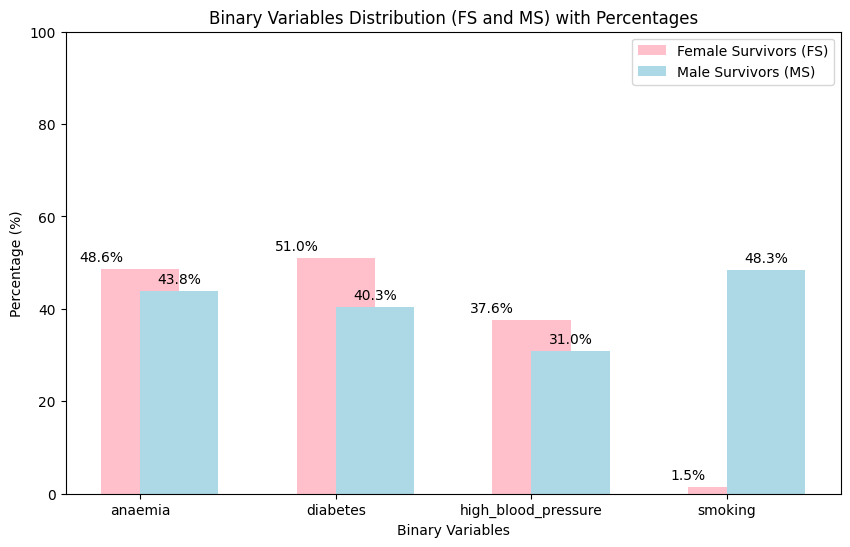

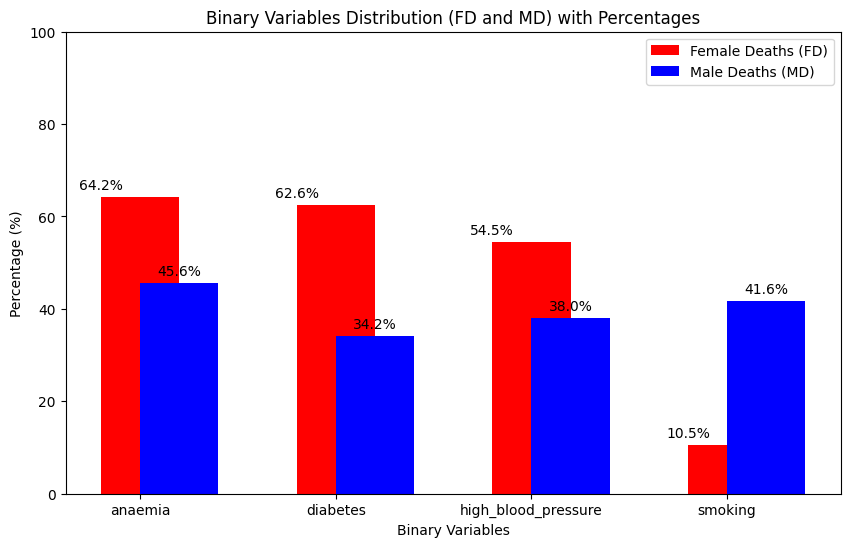

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FD = pd.read_csv("femaleDeath.csv")
MD = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to calculate percentages for binary variables
def calculate_binary_percentages(df, columns):
    percentages = {}
    for col in columns:
        percentages[col] = df[col].mean() * 100
    return percentages

# Binary variables to analyze
binary_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

# Calculate binary variable percentages for all dataframes
FS_percentages = calculate_binary_percentages(FS, binary_vars)
FD_percentages = calculate_binary_percentages(FD, binary_vars)
MD_percentages = calculate_binary_percentages(MD, binary_vars)
MS_percentages = calculate_binary_percentages(MS, binary_vars)

# Convert to DataFrames for easier plotting
FS_MS_df = pd.DataFrame({
    'Variable': binary_vars,
    'Female Survivors (FS)': [FS_percentages[var] for var in binary_vars],
    'Male Survivors (MS)': [MS_percentages[var] for var in binary_vars]
})

FD_MD_df = pd.DataFrame({
    'Variable': binary_vars,
    'Female Deaths (FD)': [FD_percentages[var] for var in binary_vars],
    'Male Deaths (MD)': [MD_percentages[var] for var in binary_vars]
})

# Plotting the distributions with percentage labels

# Plot for FS and MS
plt.figure(figsize=(10, 6))
width = 0.4  # Width of the bars
plt.bar(FS_MS_df['Variable'], FS_MS_df['Female Survivors (FS)'], width=width, color='pink', label='Female Survivors (FS)', align='center')
plt.bar(FS_MS_df['Variable'], FS_MS_df['Male Survivors (MS)'], width=width, color='lightblue', label='Male Survivors (MS)', align='edge')

# Adding percentage labels on top of each bar
for i in range(len(FS_MS_df)):
    plt.text(i - width/2, FS_MS_df['Female Survivors (FS)'][i] + 1,
             f"{FS_MS_df['Female Survivors (FS)'][i]:.1f}%", ha='center', va='bottom', color='black')
    plt.text(i + width/2, FS_MS_df['Male Survivors (MS)'][i] + 1,
             f"{FS_MS_df['Male Survivors (MS)'][i]:.1f}%", ha='center', va='bottom', color='black')

plt.title('Binary Variables Distribution (FS and MS) with Percentages')
plt.xlabel('Binary Variables')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.legend()
plt.show()

# Plot for FD and MD
plt.figure(figsize=(10, 6))
plt.bar(FD_MD_df['Variable'], FD_MD_df['Female Deaths (FD)'], width=width, color='red', label='Female Deaths (FD)', align='center')
plt.bar(FD_MD_df['Variable'], FD_MD_df['Male Deaths (MD)'], width=width, color='blue', label='Male Deaths (MD)', align='edge')

# Adding percentage labels on top of each bar
for i in range(len(FD_MD_df)):
    plt.text(i - width/2, FD_MD_df['Female Deaths (FD)'][i] + 1,
             f"{FD_MD_df['Female Deaths (FD)'][i]:.1f}%", ha='center', va='bottom', color='black')
    plt.text(i + width/2, FD_MD_df['Male Deaths (MD)'][i] + 1,
             f"{FD_MD_df['Male Deaths (MD)'][i]:.1f}%", ha='center', va='bottom', color='black')

plt.title('Binary Variables Distribution (FD and MD) with Percentages')
plt.xlabel('Binary Variables')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.legend()
plt.show()


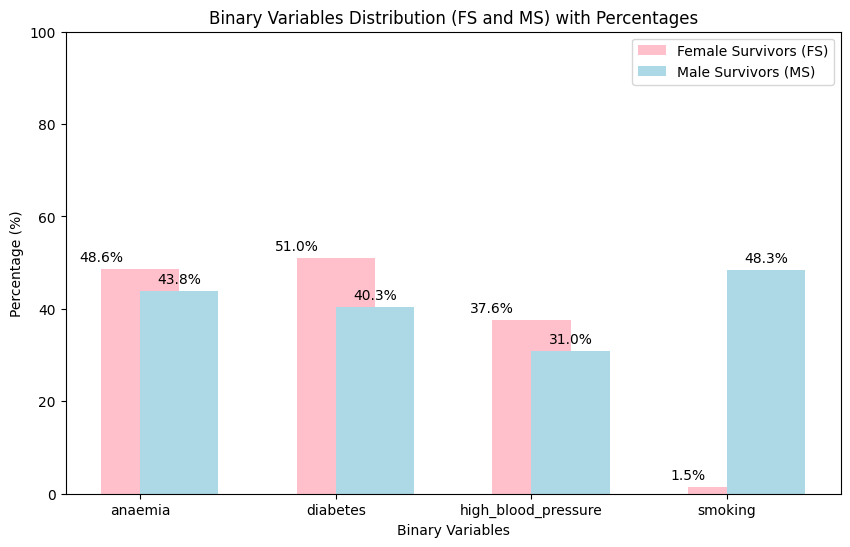

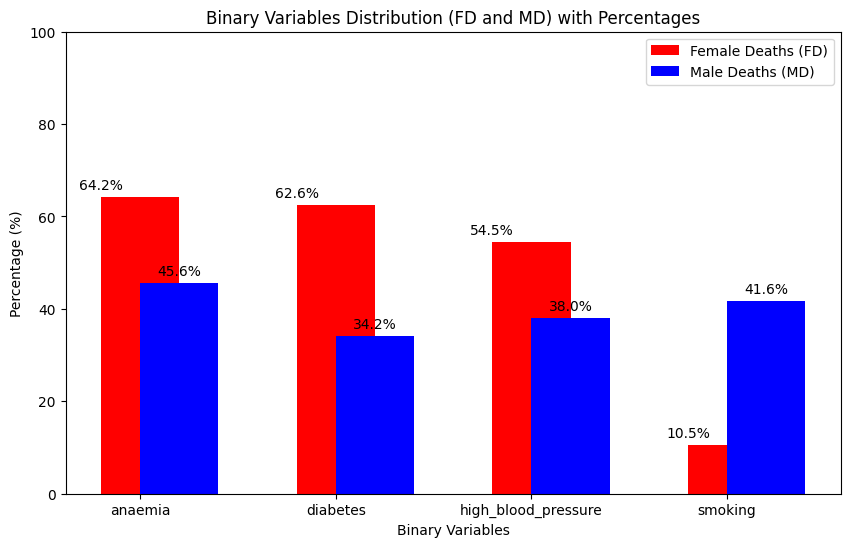

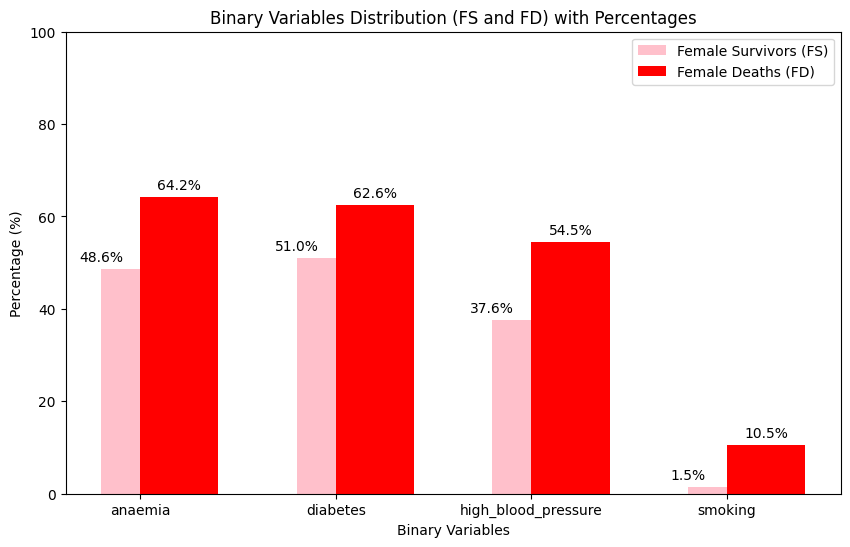

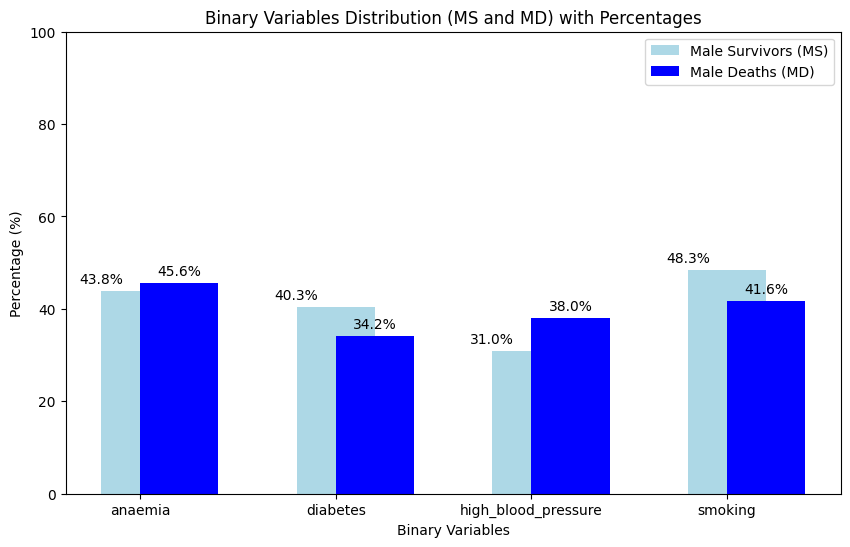

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FD = pd.read_csv("femaleDeath.csv")
MD = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to calculate percentages for binary variables
def calculate_binary_percentages(df, columns):
    percentages = {}
    for col in columns:
        percentages[col] = df[col].mean() * 100
    return percentages

# Binary variables to analyze
binary_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

# Calculate binary variable percentages for all dataframes
FS_percentages = calculate_binary_percentages(FS, binary_vars)
FD_percentages = calculate_binary_percentages(FD, binary_vars)
MD_percentages = calculate_binary_percentages(MD, binary_vars)
MS_percentages = calculate_binary_percentages(MS, binary_vars)

# Convert to DataFrames for easier plotting
FS_MS_df = pd.DataFrame({
    'Variable': binary_vars,
    'Female Survivors (FS)': [FS_percentages[var] for var in binary_vars],
    'Male Survivors (MS)': [MS_percentages[var] for var in binary_vars]
})

FD_MD_df = pd.DataFrame({
    'Variable': binary_vars,
    'Female Deaths (FD)': [FD_percentages[var] for var in binary_vars],
    'Male Deaths (MD)': [MD_percentages[var] for var in binary_vars]
})

# Combined FS and FD into one DataFrame
FS_FD_df = pd.DataFrame({
    'Variable': binary_vars,
    'Female Survivors (FS)': [FS_percentages[var] for var in binary_vars],
    'Female Deaths (FD)': [FD_percentages[var] for var in binary_vars]
})

# Combined MS and MD into one DataFrame
MS_MD_df = pd.DataFrame({
    'Variable': binary_vars,
    'Male Survivors (MS)': [MS_percentages[var] for var in binary_vars],
    'Male Deaths (MD)': [MD_percentages[var] for var in binary_vars]
})

# Plotting the distributions

# Plot for FS and MS
plt.figure(figsize=(10, 6))
width = 0.4  # Width of the bars
plt.bar(FS_MS_df['Variable'], FS_MS_df['Female Survivors (FS)'], width=width, color='pink', label='Female Survivors (FS)', align='center')
plt.bar(FS_MS_df['Variable'], FS_MS_df['Male Survivors (MS)'], width=width, color='lightblue', label='Male Survivors (MS)', align='edge')

# Adding percentage labels on top of each bar
for i in range(len(FS_MS_df)):
    plt.text(i - width/2, FS_MS_df['Female Survivors (FS)'][i] + 1,
             f"{FS_MS_df['Female Survivors (FS)'][i]:.1f}%", ha='center', va='bottom', color='black')
    plt.text(i + width/2, FS_MS_df['Male Survivors (MS)'][i] + 1,
             f"{FS_MS_df['Male Survivors (MS)'][i]:.1f}%", ha='center', va='bottom', color='black')

plt.title('Binary Variables Distribution (FS and MS) with Percentages')
plt.xlabel('Binary Variables')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.legend()
plt.show()

# Plot for FD and MD
plt.figure(figsize=(10, 6))
plt.bar(FD_MD_df['Variable'], FD_MD_df['Female Deaths (FD)'], width=width, color='red', label='Female Deaths (FD)', align='center')
plt.bar(FD_MD_df['Variable'], FD_MD_df['Male Deaths (MD)'], width=width, color='blue', label='Male Deaths (MD)', align='edge')

# Adding percentage labels on top of each bar
for i in range(len(FD_MD_df)):
    plt.text(i - width/2, FD_MD_df['Female Deaths (FD)'][i] + 1,
             f"{FD_MD_df['Female Deaths (FD)'][i]:.1f}%", ha='center', va='bottom', color='black')
    plt.text(i + width/2, FD_MD_df['Male Deaths (MD)'][i] + 1,
             f"{FD_MD_df['Male Deaths (MD)'][i]:.1f}%", ha='center', va='bottom', color='black')

plt.title('Binary Variables Distribution (FD and MD) with Percentages')
plt.xlabel('Binary Variables')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.legend()
plt.show()

# Combined plot for FS and FD
plt.figure(figsize=(10, 6))
plt.bar(FS_FD_df['Variable'], FS_FD_df['Female Survivors (FS)'], width=width, color='pink', label='Female Survivors (FS)', align='center')
plt.bar(FS_FD_df['Variable'], FS_FD_df['Female Deaths (FD)'], width=width, color='red', label='Female Deaths (FD)', align='edge')

# Adding percentage labels on top of each bar
for i in range(len(FS_FD_df)):
    plt.text(i - width/2, FS_FD_df['Female Survivors (FS)'][i] + 1,
             f"{FS_FD_df['Female Survivors (FS)'][i]:.1f}%", ha='center', va='bottom', color='black')
    plt.text(i + width/2, FS_FD_df['Female Deaths (FD)'][i] + 1,
             f"{FS_FD_df['Female Deaths (FD)'][i]:.1f}%", ha='center', va='bottom', color='black')

plt.title('Binary Variables Distribution (FS and FD) with Percentages')
plt.xlabel('Binary Variables')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.legend()
plt.show()

# Combined plot for MS and MD
plt.figure(figsize=(10, 6))
plt.bar(MS_MD_df['Variable'], MS_MD_df['Male Survivors (MS)'], width=width, color='lightblue', label='Male Survivors (MS)', align='center')
plt.bar(MS_MD_df['Variable'], MS_MD_df['Male Deaths (MD)'], width=width, color='blue', label='Male Deaths (MD)', align='edge')

# Adding percentage labels on top of each bar
for i in range(len(MS_MD_df)):
    plt.text(i - width/2, MS_MD_df['Male Survivors (MS)'][i] + 1,
             f"{MS_MD_df['Male Survivors (MS)'][i]:.1f}%", ha='center', va='bottom', color='black')
    plt.text(i + width/2, MS_MD_df['Male Deaths (MD)'][i] + 1,
             f"{MS_MD_df['Male Deaths (MD)'][i]:.1f}%", ha='center', va='bottom', color='black')

plt.title('Binary Variables Distribution (MS and MD) with Percentages')
plt.xlabel('Binary Variables')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.legend()
plt.show()


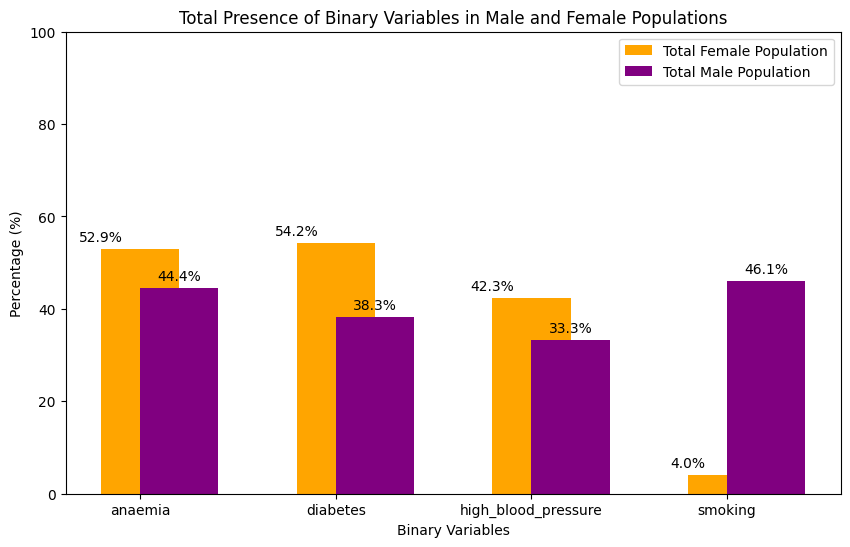

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FD = pd.read_csv("femaleDeath.csv")
MD = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to calculate percentages for binary variables
def calculate_binary_percentages(df, columns):
    percentages = {}
    for col in columns:
        percentages[col] = df[col].mean() * 100
    return percentages

# Binary variables to analyze
binary_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

# Calculate binary variable percentages for all dataframes
FS_percentages = calculate_binary_percentages(FS, binary_vars)
FD_percentages = calculate_binary_percentages(FD, binary_vars)
MD_percentages = calculate_binary_percentages(MD, binary_vars)
MS_percentages = calculate_binary_percentages(MS, binary_vars)

# Calculate total percentages for male and female populations
total_female_percentages = {
    var: (FS_percentages[var] * len(FS) + FD_percentages[var] * len(FD)) / (len(FS) + len(FD))
    for var in binary_vars
}

total_male_percentages = {
    var: (MS_percentages[var] * len(MS) + MD_percentages[var] * len(MD)) / (len(MS) + len(MD))
    for var in binary_vars
}

# Convert to DataFrame for plotting
total_percentages_df = pd.DataFrame({
    'Variable': binary_vars,
    'Total Female Population': [total_female_percentages[var] for var in binary_vars],
    'Total Male Population': [total_male_percentages[var] for var in binary_vars]
})

# Plotting the combined total percentages for males and females
plt.figure(figsize=(10, 6))
width = 0.4  # Width of the bars

# Plot Female bars
plt.bar(total_percentages_df['Variable'], total_percentages_df['Total Female Population'], width=width, color='orange', label='Total Female Population', align='center')

# Plot Male bars
plt.bar(total_percentages_df['Variable'], total_percentages_df['Total Male Population'], width=width, color='purple', label='Total Male Population', align='edge')

# Adding percentage labels on top of each bar
for i in range(len(total_percentages_df)):
    plt.text(i - width/2, total_percentages_df['Total Female Population'][i] + 1,
             f"{total_percentages_df['Total Female Population'][i]:.1f}%", ha='center', va='bottom', color='black')
    plt.text(i + width/2, total_percentages_df['Total Male Population'][i] + 1,
             f"{total_percentages_df['Total Male Population'][i]:.1f}%", ha='center', va='bottom', color='black')

# Plot details
plt.title('Total Presence of Binary Variables in Male and Female Populations')
plt.xlabel('Binary Variables')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.legend()
plt.show()


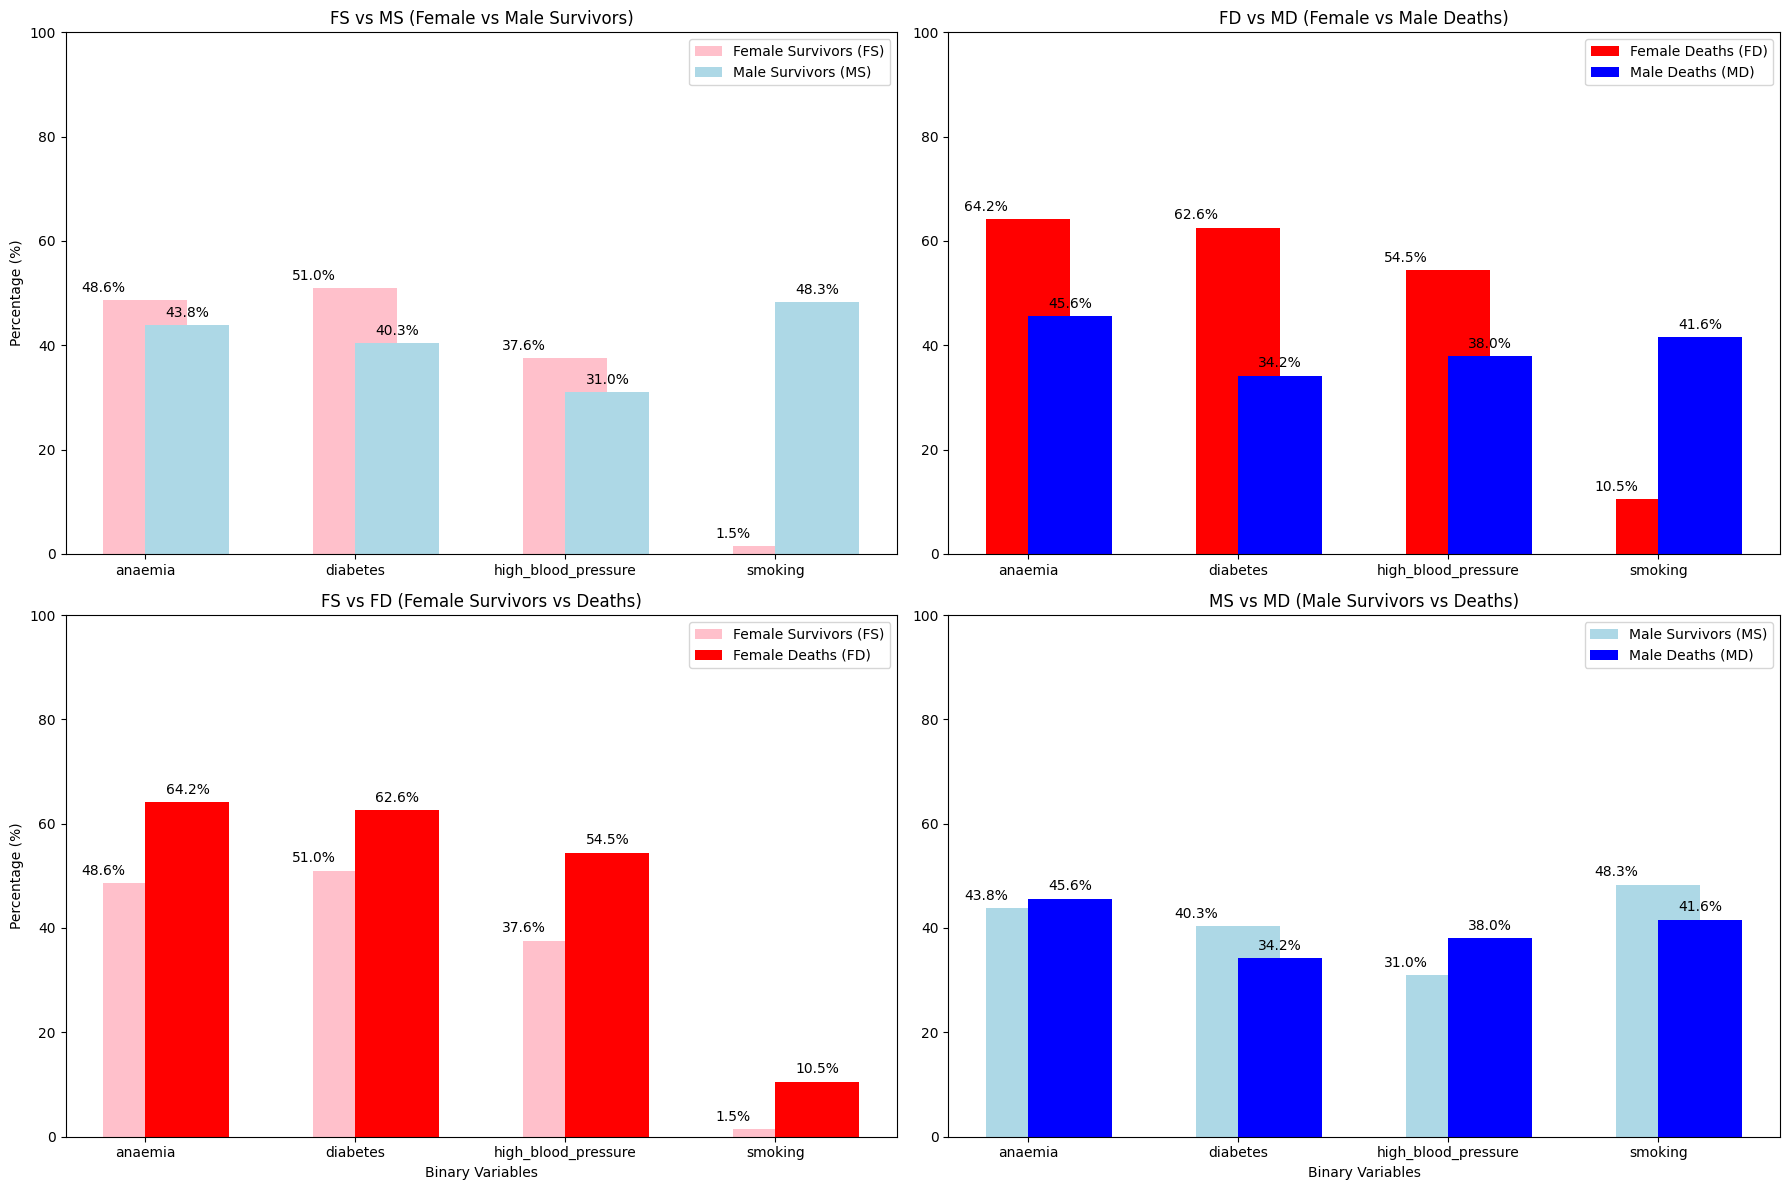

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FD = pd.read_csv("femaleDeath.csv")
MD = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Function to calculate percentages for binary variables
def calculate_binary_percentages(df, columns):
    percentages = {}
    for col in columns:
        percentages[col] = df[col].mean() * 100
    return percentages

# Binary variables to analyze
binary_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

# Calculate binary variable percentages for all dataframes
FS_percentages = calculate_binary_percentages(FS, binary_vars)
FD_percentages = calculate_binary_percentages(FD, binary_vars)
MD_percentages = calculate_binary_percentages(MD, binary_vars)
MS_percentages = calculate_binary_percentages(MS, binary_vars)

# Convert to DataFrames for easier plotting
FS_MS_df = pd.DataFrame({
    'Variable': binary_vars,
    'Female Survivors (FS)': [FS_percentages[var] for var in binary_vars],
    'Male Survivors (MS)': [MS_percentages[var] for var in binary_vars]
})

FD_MD_df = pd.DataFrame({
    'Variable': binary_vars,
    'Female Deaths (FD)': [FD_percentages[var] for var in binary_vars],
    'Male Deaths (MD)': [MD_percentages[var] for var in binary_vars]
})

# Combined FS and FD into one DataFrame
FS_FD_df = pd.DataFrame({
    'Variable': binary_vars,
    'Female Survivors (FS)': [FS_percentages[var] for var in binary_vars],
    'Female Deaths (FD)': [FD_percentages[var] for var in binary_vars]
})

# Combined MS and MD into one DataFrame
MS_MD_df = pd.DataFrame({
    'Variable': binary_vars,
    'Male Survivors (MS)': [MS_percentages[var] for var in binary_vars],
    'Male Deaths (MD)': [MD_percentages[var] for var in binary_vars]
})

# Plotting the distributions side by side

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
width = 0.4  # Width of the bars

# Plot FS vs MS
axes[0, 0].bar(FS_MS_df['Variable'], FS_MS_df['Female Survivors (FS)'], width=width, color='pink', label='Female Survivors (FS)', align='center')
axes[0, 0].bar(FS_MS_df['Variable'], FS_MS_df['Male Survivors (MS)'], width=width, color='lightblue', label='Male Survivors (MS)', align='edge')
axes[0, 0].set_title('FS vs MS (Female vs Male Survivors)')
axes[0, 0].set_ylim(0, 100)
axes[0, 0].set_ylabel('Percentage (%)')
axes[0, 0].legend()
for i in range(len(FS_MS_df)):
    axes[0, 0].text(i - width/2, FS_MS_df['Female Survivors (FS)'][i] + 1,
                    f"{FS_MS_df['Female Survivors (FS)'][i]:.1f}%", ha='center', va='bottom', color='black')
    axes[0, 0].text(i + width/2, FS_MS_df['Male Survivors (MS)'][i] + 1,
                    f"{FS_MS_df['Male Survivors (MS)'][i]:.1f}%", ha='center', va='bottom', color='black')

# Plot FD vs MD
axes[0, 1].bar(FD_MD_df['Variable'], FD_MD_df['Female Deaths (FD)'], width=width, color='red', label='Female Deaths (FD)', align='center')
axes[0, 1].bar(FD_MD_df['Variable'], FD_MD_df['Male Deaths (MD)'], width=width, color='blue', label='Male Deaths (MD)', align='edge')
axes[0, 1].set_title('FD vs MD (Female vs Male Deaths)')
axes[0, 1].set_ylim(0, 100)
axes[0, 1].legend()
for i in range(len(FD_MD_df)):
    axes[0, 1].text(i - width/2, FD_MD_df['Female Deaths (FD)'][i] + 1,
                    f"{FD_MD_df['Female Deaths (FD)'][i]:.1f}%", ha='center', va='bottom', color='black')
    axes[0, 1].text(i + width/2, FD_MD_df['Male Deaths (MD)'][i] + 1,
                    f"{FD_MD_df['Male Deaths (MD)'][i]:.1f}%", ha='center', va='bottom', color='black')

# Plot FS vs FD
axes[1, 0].bar(FS_FD_df['Variable'], FS_FD_df['Female Survivors (FS)'], width=width, color='pink', label='Female Survivors (FS)', align='center')
axes[1, 0].bar(FS_FD_df['Variable'], FS_FD_df['Female Deaths (FD)'], width=width, color='red', label='Female Deaths (FD)', align='edge')
axes[1, 0].set_title('FS vs FD (Female Survivors vs Deaths)')
axes[1, 0].set_ylim(0, 100)
axes[1, 0].set_xlabel('Binary Variables')
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].legend()
for i in range(len(FS_FD_df)):
    axes[1, 0].text(i - width/2, FS_FD_df['Female Survivors (FS)'][i] + 1,
                    f"{FS_FD_df['Female Survivors (FS)'][i]:.1f}%", ha='center', va='bottom', color='black')
    axes[1, 0].text(i + width/2, FS_FD_df['Female Deaths (FD)'][i] + 1,
                    f"{FS_FD_df['Female Deaths (FD)'][i]:.1f}%", ha='center', va='bottom', color='black')

# Plot MS vs MD
axes[1, 1].bar(MS_MD_df['Variable'], MS_MD_df['Male Survivors (MS)'], width=width, color='lightblue', label='Male Survivors (MS)', align='center')
axes[1, 1].bar(MS_MD_df['Variable'], MS_MD_df['Male Deaths (MD)'], width=width, color='blue', label='Male Deaths (MD)', align='edge')
axes[1, 1].set_title('MS vs MD (Male Survivors vs Deaths)')
axes[1, 1].set_ylim(0, 100)
axes[1, 1].set_xlabel('Binary Variables')
axes[1, 1].legend()
for i in range(len(MS_MD_df)):
    axes[1, 1].text(i - width/2, MS_MD_df['Male Survivors (MS)'][i] + 1,
                    f"{MS_MD_df['Male Survivors (MS)'][i]:.1f}%", ha='center', va='bottom', color='black')
    axes[1, 1].text(i + width/2, MS_MD_df['Male Deaths (MD)'][i] + 1,
                    f"{MS_MD_df['Male Deaths (MD)'][i]:.1f}%", ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the data
df = pd.read_csv("heart_failure_clinical_records.csv")

# Create a new column for survival status: 0 for survivors, 1 for deaths
df['survival_status'] = df['DEATH_EVENT']

# Binary variables to analyze
binary_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

# Function to perform Chi-Square test
def perform_chi_square_test(df, var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Chi-Square Tests for Sex Differences
print("Chi-Square Tests for Sex Differences:")
for var in binary_vars:
    chi2, p = perform_chi_square_test(df, 'sex', var)
    print(f"Sex vs {var}: Chi-Square = {chi2}, p-value = {p}")

# Chi-Square Tests for Survival vs Mortality
print("\nChi-Square Tests for Survival vs Mortality:")
for var in binary_vars:
    chi2, p = perform_chi_square_test(df, 'survival_status', var)
    print(f"Survival Status vs {var}: Chi-Square = {chi2}, p-value = {p}")


Chi-Square Tests for Sex Differences:
Sex vs anaemia: Chi-Square = 32.89200508079014, p-value = 9.742309870601673e-09
Sex vs diabetes: Chi-Square = 117.3936991221463, p-value = 2.353834846800844e-27
Sex vs high_blood_pressure: Chi-Square = 39.30439477690848, p-value = 3.6262421988844835e-10
Sex vs smoking: Chi-Square = 942.5176024541547, p-value = 5.6135660873425e-207

Chi-Square Tests for Survival vs Mortality:
Survival Status vs anaemia: Chi-Square = 14.621476178037572, p-value = 0.0001314084504967406
Survival Status vs diabetes: Chi-Square = 0.5874041506087733, p-value = 0.4434246767522827
Survival Status vs high_blood_pressure: Chi-Square = 43.78150950153666, p-value = 3.6715748221572216e-11
Survival Status vs smoking: Chi-Square = 0.3988514537859381, p-value = 0.5276830107676712


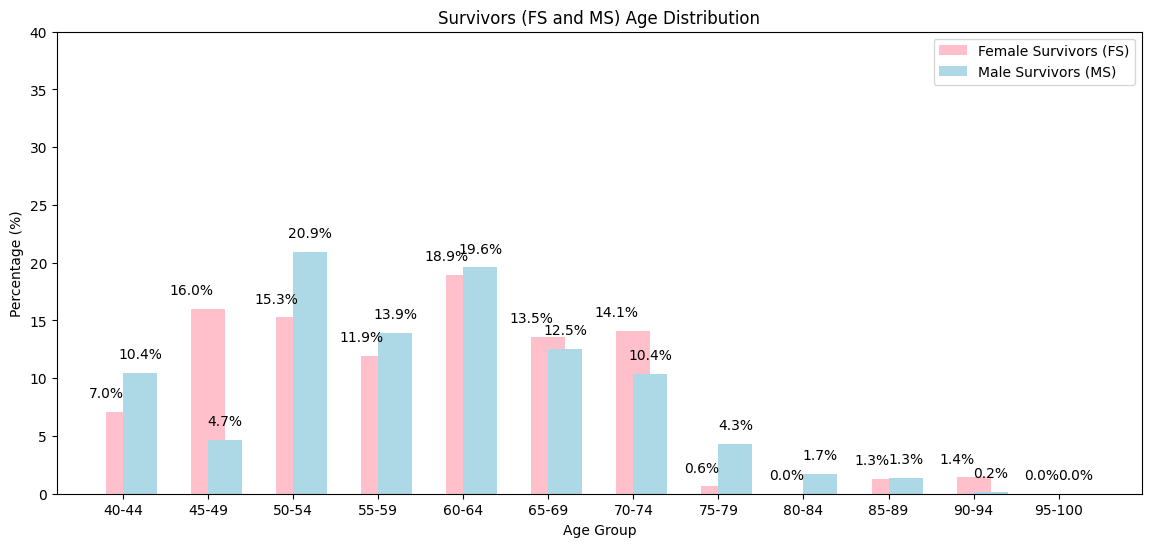

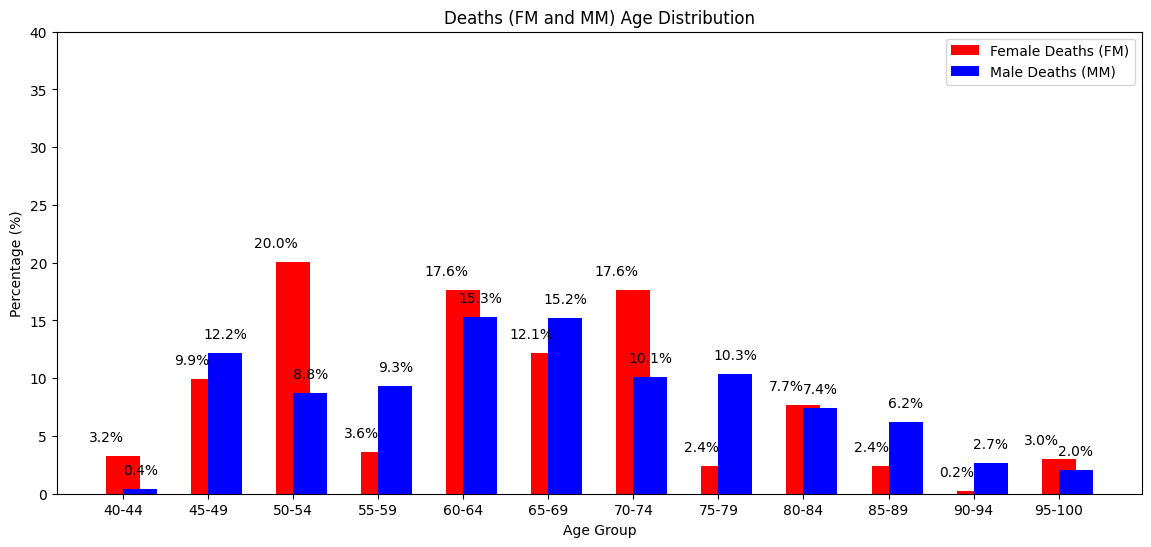

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FM = pd.read_csv("femaleDeath.csv")
MM = pd.read_csv("MaleDeaths.csv")
MS = pd.read_csv("MaleSurvivor.csv")

# Define age bins with 5-year intervals starting from 40
age_bins = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
age_labels = ['40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-100']

# Function to calculate age distribution
def calculate_age_distribution(df, bins, labels):
    age_distribution = pd.cut(df['age'], bins=bins, labels=labels, right=False)
    age_distribution_percentage = age_distribution.value_counts(normalize=True) * 100
    return age_distribution_percentage.sort_index()

# Calculate age distribution for all dataframes
FS_age_distribution = calculate_age_distribution(FS, age_bins, age_labels)
FM_age_distribution = calculate_age_distribution(FM, age_bins, age_labels)
MM_age_distribution = calculate_age_distribution(MM, age_bins, age_labels)
MS_age_distribution = calculate_age_distribution(MS, age_bins, age_labels)

# Plotting the combined distributions

# Plot for FS and MS
plt.figure(figsize=(14, 6))
plt.bar(FS_age_distribution.index, FS_age_distribution.values, width=0.4, color='pink', label='Female Survivors (FS)', align='center')
plt.bar(MS_age_distribution.index, MS_age_distribution.values, width=0.4, color='lightblue', label='Male Survivors (MS)', align='edge')

# Adding percentage labels on top of each bar
for i in range(len(FS_age_distribution)):
    plt.text(i - 0.2, FS_age_distribution.values[i] + 1,
             f"{FS_age_distribution.values[i]:.1f}%", ha='center', va='bottom', color='black')
    plt.text(i + 0.2, MS_age_distribution.values[i] + 1,
             f"{MS_age_distribution.values[i]:.1f}%", ha='center', va='bottom', color='black')

plt.title('Survivors (FS and MS) Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.ylim(0, 40)
plt.legend()
plt.show()

# Plot for FM and MM
plt.figure(figsize=(14, 6))
plt.bar(FM_age_distribution.index, FM_age_distribution.values, width=0.4, color='red', label='Female Deaths (FM)', align='center')
plt.bar(MM_age_distribution.index, MM_age_distribution.values, width=0.4, color='blue', label='Male Deaths (MM)', align='edge')

# Adding percentage labels on top of each bar
for i in range(len(FM_age_distribution)):
    plt.text(i - 0.2, FM_age_distribution.values[i] + 1,
             f"{FM_age_distribution.values[i]:.1f}%", ha='center', va='bottom', color='black')
    plt.text(i + 0.2, MM_age_distribution.values[i] + 1,
             f"{MM_age_distribution.values[i]:.1f}%", ha='center', va='bottom', color='black')

plt.title('Deaths (FM and MM) Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.ylim(0, 40)
plt.legend()
plt.show()


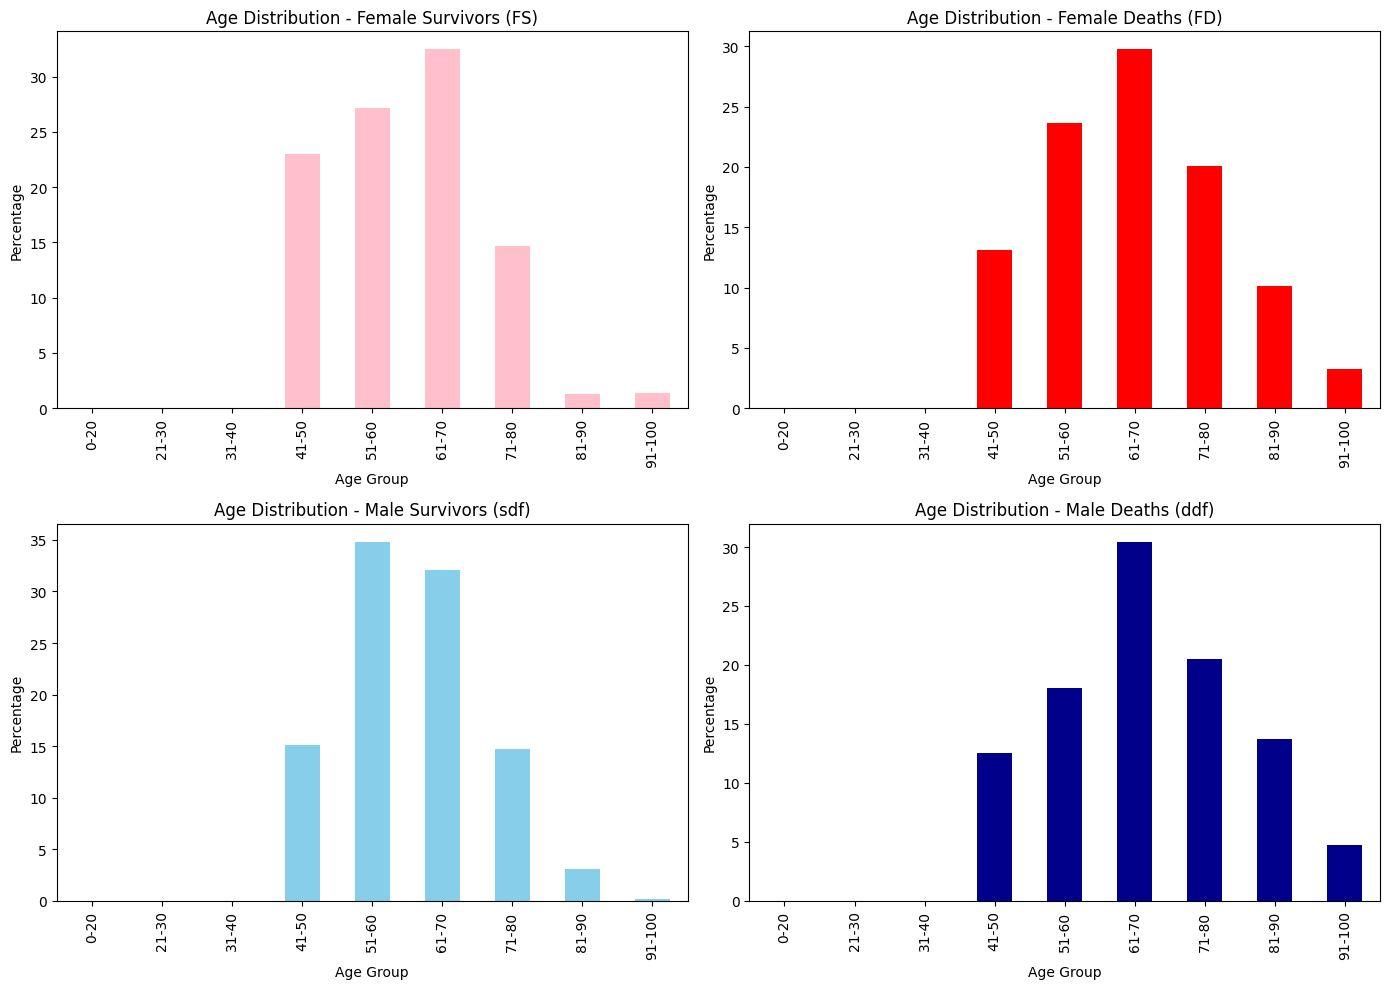

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FD = pd.read_csv("femaleDeath.csv")
sdf = pd.read_csv("MaleSurvivor.csv")
ddf = pd.read_csv("MaleDeaths.csv")

# Define a function to calculate age distribution in percentages
def age_distribution(df, group_name):
    # Create age bins
    age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

    # Bin the age data
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

    # Calculate the percentage distribution
    distribution = df['age_group'].value_counts(normalize=True) * 100

    # Sort the distribution by age group for consistency
    distribution = distribution.sort_index()

    return distribution

# Calculate distributions
fs_age_distribution = age_distribution(FS, 'Female Survivor (FS)')
fd_age_distribution = age_distribution(FD, 'Female Death (FD)')
sdf_age_distribution = age_distribution(sdf, 'Male Survivor (sdf)')
ddf_age_distribution = age_distribution(ddf, 'Male Death (ddf)')

# Plot the distributions
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
fs_age_distribution.plot(kind='bar', color='pink')
plt.title('Age Distribution - Female Survivors (FS)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')

plt.subplot(2, 2, 2)
fd_age_distribution.plot(kind='bar', color='red')
plt.title('Age Distribution - Female Deaths (FD)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')

plt.subplot(2, 2, 3)
sdf_age_distribution.plot(kind='bar', color='skyblue')
plt.title('Age Distribution - Male Survivors (sdf)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')

plt.subplot(2, 2, 4)
ddf_age_distribution.plot(kind='bar', color='darkblue')
plt.title('Age Distribution - Male Deaths (ddf)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the data
FS = pd.read_csv("femaleSurvivors.csv")
FD = pd.read_csv("femaleDeath.csv")
sdf = pd.read_csv("MaleSurvivor.csv")
ddf = pd.read_csv("MaleDeaths.csv")

# Define a function to calculate age distribution in percentages
def age_distribution(df, group_name):
    # Create age bins
    age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

    # Bin the age data
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

    # Calculate the percentage distribution
    distribution = df['age_group'].value_counts(normalize=True) * 100

    # Convert to DataFrame for easier reading
    distribution_df = distribution.reset_index()
    distribution_df.columns = ['Age Group', f'{group_name} Percentage']

    return distribution_df

# Calculate distributions
fs_age_distribution = age_distribution(FS, 'Female Survivor (FS)')
fd_age_distribution = age_distribution(FD, 'Female Death (FD)')
sdf_age_distribution = age_distribution(sdf, 'Male Survivor (sdf)')
ddf_age_distribution = age_distribution(ddf, 'Male Death (ddf)')

# Display the results
print("Age Distribution for Female Survivors (FS):")
print(fs_age_distribution)
print("\nAge Distribution for Female Deaths (FD):")
print(fd_age_distribution)
print("\nAge Distribution for Male Survivors (sdf):")
print(sdf_age_distribution)
print("\nAge Distribution for Male Deaths (ddf):")
print(ddf_age_distribution)


Age Distribution for Female Survivors (FS):
  Age Group  Female Survivor (FS) Percentage
0     61-70                        32.472613
1     51-60                        27.151800
2     41-50                        23.004695
3     71-80                        14.710485
4    91-100                         1.408451
5     81-90                         1.251956
6      0-20                         0.000000
7     21-30                         0.000000
8     31-40                         0.000000

Age Distribution for Female Deaths (FD):
  Age Group  Female Death (FD) Percentage
0     61-70                     29.757085
1     51-60                     23.684211
2     71-80                     20.040486
3     41-50                     13.157895
4     81-90                     10.121457
5    91-100                      3.238866
6      0-20                      0.000000
7     21-30                      0.000000
8     31-40                      0.000000

Age Distribution for Male Survivors (sdf):


In [ ]:
FS = pd.read_csv("femaleSurvivors.csv")
FD = pd.read_csv("femaleDeath.csv")
ft = pd.read_csv("Female.csv")
sdf = pd.read_csv("MaleSurvivor.csv")
ddf = pd.read_csv("MaleDeaths.csv")


FS = FS.loc[:, ~FS.columns.str.contains('^Unnamed')]
print("Columns after removal of 'Unnamed':", FS.columns)

FD = FD.loc[:, ~FD.columns.str.contains('^Unnamed')]
print("Columns after removal of 'Unnamed':", FD.columns)

ft = ft.loc[:, ~ft.columns.str.contains('^Unnamed')]
print("Columns after removal of 'Unnamed':", ft.columns)

Columns after removal of 'Unnamed': Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
Columns after removal of 'Unnamed': Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
Columns after removal of 'Unnamed': Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [ ]:
FS.describe()
ft.tail()
FS.tail()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1273,65.0,1,335,0,35,1,235000.0,0.8,136,0,0,120,0
1274,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
1275,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
1276,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
1277,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0


In [ ]:
FD.describe()
# FD.tail()



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.0,494.000000,494.000000,494.0
mean,62.629555,0.641700,548.736842,0.625506,36.967611,0.544534,268969.181356,1.893036,135.257085,0.0,0.105263,67.230769,1.0
std,12.702175,0.479987,918.823772,0.484483,14.235165,0.498518,102709.309543,1.514724,7.136790,0.0,0.307203,55.856228,0.0
min,40.000000,0.000000,47.000000,0.000000,14.000000,0.000000,29700.000000,0.600000,116.000000,0.0,0.000000,4.000000,1.0
25%,50.000000,0.000000,131.000000,0.000000,25.000000,0.000000,216000.000000,1.000000,131.250000,0.0,0.000000,28.000000,1.0
50%,60.000000,1.000000,250.000000,1.000000,35.000000,1.000000,263358.030000,1.600000,136.000000,0.0,0.000000,45.000000,1.0
75%,72.000000,1.000000,582.000000,1.000000,50.000000,1.000000,321000.000000,2.100000,140.000000,0.0,0.000000,88.000000,1.0
max,95.000000,1.000000,7702.000000,1.000000,70.000000,1.000000,621000.000000,9.000000,146.000000,0.0,1.000000,250.000000,1.0


In [ ]:
FS.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.0,1278.000000,1278.000000,1278.0
mean,57.795261,0.485915,474.107981,0.510172,40.462441,0.375587,281029.557527,1.086455,137.857590,0.0,0.014867,156.450704,0.0
std,10.435081,0.499997,599.839808,0.500092,10.721056,0.484464,91828.180940,0.523561,3.639176,0.0,0.121068,70.670302,0.0
min,40.000000,0.000000,25.000000,0.000000,20.000000,0.000000,26500.000000,0.500000,116.000000,0.0,0.000000,12.000000,0.0
25%,50.000000,0.000000,101.000000,0.000000,35.000000,0.000000,226000.000000,0.900000,136.000000,0.0,0.000000,94.000000,0.0
50%,58.000000,0.000000,217.000000,1.000000,40.000000,0.000000,270000.000000,1.000000,138.000000,0.0,0.000000,172.000000,0.0
75%,65.000000,1.000000,582.000000,1.000000,45.000000,1.000000,318000.000000,1.200000,140.000000,0.0,0.000000,214.000000,0.0
max,90.000000,1.000000,7702.000000,1.000000,80.000000,1.000000,742000.000000,6.300000,145.000000,0.0,1.000000,285.000000,0.0


In [ ]:
import pandas as pd


# Removing 'Unnamed' column if it exists
if 'Unnamed' in FS.columns:
    FS = FS.drop(columns=['Unnamed'])

if 'Unnamed' in FD.columns:
    FD = FD.drop(columns=['Unnamed'])

# Calculate the required statistics for FS (female survivors) and FD (female death) groups

# Diabetes
FS_diabetes = FS['diabetes'].mean() * 100
FD_diabetes = FD['diabetes'].mean() * 100

# Ejection Fraction
FS_ejection_fraction = FS['ejection_fraction'].mean()
FD_ejection_fraction = FD['ejection_fraction'].mean()

# High Blood Pressure
FS_hbp = FS['high_blood_pressure'].mean() * 100
FD_hbp = FD['high_blood_pressure'].mean() * 100

# Age
FS_age = FS['age'].mean()
FD_age = FD['age'].mean()

# Anaemia
FS_anaemia = FS['anaemia'].mean() * 100
FD_anaemia = FD['anaemia'].mean() * 100

# Creatinine Phosphokinase (CPK)
FS_cpk = FS['creatinine_phosphokinase'].mean()
FD_cpk = FD['creatinine_phosphokinase'].mean()

# Platelets
FS_platelets = FS['platelets'].mean()
FD_platelets = FD['platelets'].mean()

# Serum Sodium
FS_serum_sodium = FS['serum_sodium'].mean()
FD_serum_sodium = FD['serum_sodium'].mean()

# Smoking
FS_smoking = FS['smoking'].mean() * 100
FD_smoking = FD['smoking'].mean() * 100

# Display the results
statistics = {
    'Statistic': ['Diabetes (%)', 'Ejection Fraction', 'High Blood Pressure (%)', 'Age',
                  'Anaemia (%)', 'Creatinine Phosphokinase (CPK)', 'Platelets',
                  'Serum Sodium', 'Smoking (%)'],
    'Female Survivors (FS)': [FS_diabetes, FS_ejection_fraction, FS_hbp, FS_age,
                              FS_anaemia, FS_cpk, FS_platelets, FS_serum_sodium, FS_smoking],
    'Female Death (FD)': [FD_diabetes, FD_ejection_fraction, FD_hbp, FD_age,
                          FD_anaemia, FD_cpk, FD_platelets, FD_serum_sodium, FD_smoking]
}

# Convert to DataFrame for easier display
statistics_df = pd.DataFrame(statistics)

# Display the statistics
print(statistics_df)


                        Statistic  Female Survivors (FS)  Female Death (FD)
0                    Diabetes (%)              51.017214          62.550607
1               Ejection Fraction              40.462441          36.967611
2         High Blood Pressure (%)              37.558685          54.453441
3                             Age              57.795261          62.629555
4                     Anaemia (%)              48.591549          64.170040
5  Creatinine Phosphokinase (CPK)             474.107981         548.736842
6                       Platelets          281029.557527      268969.181356
7                    Serum Sodium             137.857590         135.257085
8                     Smoking (%)               1.486698          10.526316


According to the statistical analysis:

 - Female deaths have a higher average age (62.63) compared to female survivors (57.80).

 - There is a higher prevelance of anaemia among female deaths (0.642) compared to survivors (0.486).

 - There is a higher mean level in female deaths for CPK (548.74) compared to survivors (474.11).

 - Diabetes is more common among female deaths (0.626) then survivors (0.510).

 - There is lower mean for ejection fraction in female deaths (36.97) compared to survivors (40.46).

 - High blood pressure appears to be more common in female deaths (0.545) compared to survivors (0.376).

 - There is a lower mean count in female deaths for platelets (268969) compared to the survivors (281029.56).

 - There is a higher mean level of serum creatinine for female deaths (1.893) compared to the survivors (1.086).

 - There is a lower mean level for serum sodium in females deaths (135.26) compared to survivors (137.86).

 - Smoking is more prevelant in female deaths (0.105) then survivors (0.015).

 - Also there is a shorter mean follow up time for female deaths (67.23) compared to the survivors (156.45).

Therefore overall in conculsion, female deaths are associated with higher age, higher prevelance of anemia, diabetes, creatinine phosphokianse and serum cretinine, lower ejection and lower serum sodium. Furthermore high blood pressure and smoking are also more common among the female deaths. These differences highlight various factors that contribute to the death risk among the females in the dataset.


